In [4]:
import random
import time
import math
import json
import pprint

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('paper')
sns.set(font_scale=1.5)


import warnings
warnings.filterwarnings('ignore')


import h2o
h2o.init()


DATA_LOCATION  = "../../data/"
MODELS_LOCATION = "../../models/"

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,08 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.4
H2O_cluster_version_age:,5 months and 20 days !!!
H2O_cluster_name:,H2O_from_python_azureuser_leufpx
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.108 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [5]:
# Create a util function to extract training time in minutes
def millis_to_minutes(millis):
    minutes=(millis/(1000*60))%60
    # minutes = math.ceil(float(minutes))
    return minutes



# Models trained on ALL_FEATURES




In [6]:
top_dl= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_dl/DeepLearning_model_python_1605423034668_341")
top_drf= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_drf/DRF_model_python_1605423034668_386")
top_gbm= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_gbm/GBM_model_python_1605423034668_39")
top_glm= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_glm/GLM_model_python_1605423034668_20")
top_nb= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_nb/NaiveBayes_model_python_1605423034668_1")
top_xgb= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_xgb/XGBoost_model_python_1605423034668_274")



# top_ensemble_ALL_MODELS_METALEARNER_auto= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_ALL_MODELS_METALEARNER_auto/stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_auto")
top_ensemble_ALL_MODELS_METALEARNER_deeplearning= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_ALL_MODELS_METALEARNER_deeplearning/stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_deeplearning")
top_ensemble_ALL_MODELS_METALEARNER_drf= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_ALL_MODELS_METALEARNER_drf/stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_drf")
top_ensemble_ALL_MODELS_METALEARNER_gbm= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_ALL_MODELS_METALEARNER_gbm/stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_gbm")
top_ensemble_ALL_MODELS_METALEARNER_glm= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_ALL_MODELS_METALEARNER_glm/stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_glm")
top_ensemble_ALL_MODELS_METALEARNER_naivebayes= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_ALL_MODELS_METALEARNER_naivebayes/stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_naivebayes")
top_ensemble_ALL_MODELS_METALEARNER_xgboost= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_ALL_MODELS_METALEARNER_xgboost/stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_xgboost")


# top_ensemble_CHECKPOINT_MODELS_METALEARNER_auto= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_MODELS_METALEARNER_auto/stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_auto")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_deeplearning= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_MODELS_METALEARNER_deeplearning/stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_deeplearning")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_drf= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_MODELS_METALEARNER_drf/stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_drf")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_gbm= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_MODELS_METALEARNER_gbm/stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_gbm")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_glm= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_MODELS_METALEARNER_glm/stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_glm")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_naivebayes= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_MODELS_METALEARNER_naivebayes/stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_naivebayes")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_xgboost= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_MODELS_METALEARNER_xgboost/stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_xgboost")


# top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_auto= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_auto/stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_auto")
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_deeplearning= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_deeplearning/stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_deeplearning")
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_drf= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_drf/stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_drf")
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_gbm= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_gbm/stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_gbm")
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_glm= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_glm/stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_glm")
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_naivebayes= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_naivebayes/stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_naivebayes")
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_xgboost= h2o.load_model(MODELS_LOCATION + "ALL_FEATURES/FINAL/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_xgboost/stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_xgboost")




# Scree plot for the PCA300 model


In [7]:
# save the model
# model_path = h2o.save_model(model= my_pca, path="../models/my_pca_model", force=True)

model_path = "../../models/PCA300/PCA_model_python_1603962989759_1_k300"

# load the model
pca300 = h2o.load_model(model_path)


a4_dims = (15, 10)
plt.figure(
    # figsize=(10,10),
    dpi=100)

fig, ax = plt.subplots(figsize=a4_dims)
ax.set_xticks([49,99,149, 199, 249, 299])
sns.lineplot(ax=ax, data= pca300_df.loc['Cumulative Proportion'])

plt.ylabel('Cumulative Proportion of Variance') 

plt.xlabel('Number of Components') 


# Models trained on PCA300 Features

In [7]:
top_dl_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_dl/DeepLearning_model_python_1605362597414_3340")
top_drf_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_drf/DRF_model_python_1605362597414_2415")
top_gbm_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_gbm/GBM_model_python_1605362597414_1525")
top_glm_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_glm/GLM_model_python_1605362597414_1506")
top_nb_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_nb/NaiveBayes_model_python_1605362597414_1487")
top_xgb_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_xgb/XGBoost_model_python_1605362597414_1768")

# top_ensemble_ALL_MODELS_METALEARNER_auto_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_ALL_MODELS_METALEARNER_auto/stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_auto")
top_ensemble_ALL_MODELS_METALEARNER_deeplearning_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_ALL_MODELS_METALEARNER_deeplearning/stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_deeplearning")
top_ensemble_ALL_MODELS_METALEARNER_drf_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_ALL_MODELS_METALEARNER_drf/stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_drf")
top_ensemble_ALL_MODELS_METALEARNER_gbm_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_ALL_MODELS_METALEARNER_gbm/stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_gbm")
top_ensemble_ALL_MODELS_METALEARNER_glm_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_ALL_MODELS_METALEARNER_glm/stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_glm")
top_ensemble_ALL_MODELS_METALEARNER_naivebayes_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_ALL_MODELS_METALEARNER_naivebayes/stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_naivebayes")
top_ensemble_ALL_MODELS_METALEARNER_xgboost_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_ALL_MODELS_METALEARNER_xgboost/stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_xgboost")

# top_ensemble_CHECKPOINT_MODELS_METALEARNER_auto_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_MODELS_METALEARNER_auto/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_auto")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_deeplearning_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_MODELS_METALEARNER_deeplearning/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_deeplearning")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_drf_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_MODELS_METALEARNER_drf/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_drf")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_gbm_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_MODELS_METALEARNER_gbm/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_gbm")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_glm_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_MODELS_METALEARNER_glm/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_glm")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_naivebayes_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_MODELS_METALEARNER_naivebayes/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_naivebayes")
top_ensemble_CHECKPOINT_MODELS_METALEARNER_xgboost_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_MODELS_METALEARNER_xgboost/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_xgboost")

# top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_auto_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_auto/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_auto")
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_deeplearning_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_deeplearning/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_deeplearning")
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_drf_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_drf/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_drf")
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_gbm_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_gbm/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_gbm")
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_glm_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_glm/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_glm")
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_naivebayes_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_naivebayes/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_naivebayes")
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_xgboost_pca= h2o.load_model(MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_xgboost/stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_xgboost")

# Analysis for all models


In [8]:
all_final_models = [
top_dl,
top_dl_pca,
top_drf,
top_drf_pca,
top_gbm,
top_gbm_pca,
top_glm,
top_glm_pca,
top_nb,
top_nb_pca,
top_xgb,
top_xgb_pca,


top_ensemble_ALL_MODELS_METALEARNER_deeplearning,
top_ensemble_ALL_MODELS_METALEARNER_deeplearning_pca,
top_ensemble_ALL_MODELS_METALEARNER_drf,
top_ensemble_ALL_MODELS_METALEARNER_drf_pca,
top_ensemble_ALL_MODELS_METALEARNER_gbm,
top_ensemble_ALL_MODELS_METALEARNER_gbm_pca,
top_ensemble_ALL_MODELS_METALEARNER_glm,
top_ensemble_ALL_MODELS_METALEARNER_glm_pca,
top_ensemble_ALL_MODELS_METALEARNER_naivebayes,
top_ensemble_ALL_MODELS_METALEARNER_naivebayes_pca,
top_ensemble_ALL_MODELS_METALEARNER_xgboost,
top_ensemble_ALL_MODELS_METALEARNER_xgboost_pca,

top_ensemble_CHECKPOINT_MODELS_METALEARNER_deeplearning,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_deeplearning_pca,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_drf,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_drf_pca,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_gbm,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_gbm_pca,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_glm,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_glm_pca,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_naivebayes,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_naivebayes_pca,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_xgboost,
top_ensemble_CHECKPOINT_MODELS_METALEARNER_xgboost_pca,

top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_deeplearning,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_deeplearning_pca,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_drf,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_drf_pca,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_gbm,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_gbm_pca,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_glm,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_glm_pca,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_naivebayes,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_naivebayes_pca ,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_xgboost,
top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_xgboost_pca,
]

# Metrics for all models

Model ID:  DeepLearning_model_python_1605423034668_341
XVal Accuracy:  0.8511856091578087
Training time (ms):  470361
XVal AUC:  0.9027482269503546


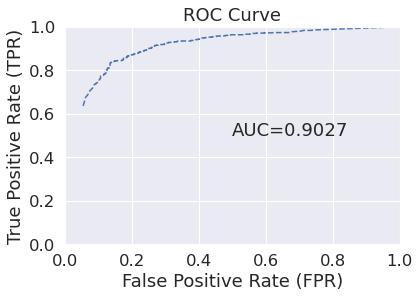

-----------------------------
Model ID:  DeepLearning_model_python_1605362597414_3340
XVal Accuracy:  0.7710547833197057
Training time (ms):  92889
XVal AUC:  0.8209884751773049


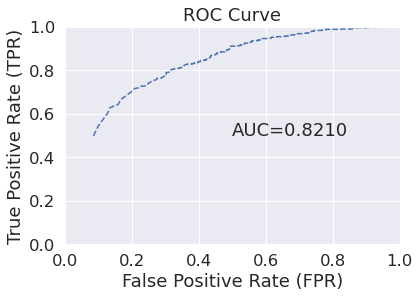

-----------------------------
Model ID:  DRF_model_python_1605423034668_386
XVal Accuracy:  0.856909239574816
Training time (ms):  1900902
XVal AUC:  0.9106057919621748


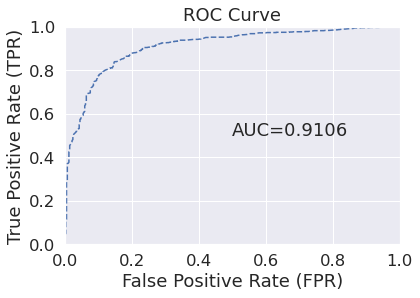

-----------------------------
Model ID:  DRF_model_python_1605362597414_2415
XVal Accuracy:  0.8348323793949305
Training time (ms):  4970
XVal AUC:  0.8844089834515367


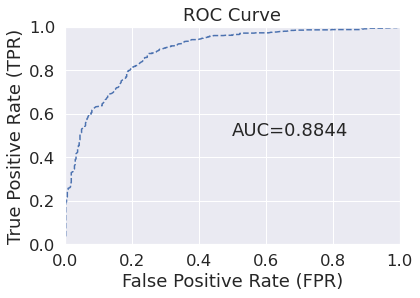

-----------------------------
Model ID:  GBM_model_python_1605423034668_39
XVal Accuracy:  0.8479149632052331
Training time (ms):  71120
XVal AUC:  0.9054151891252956


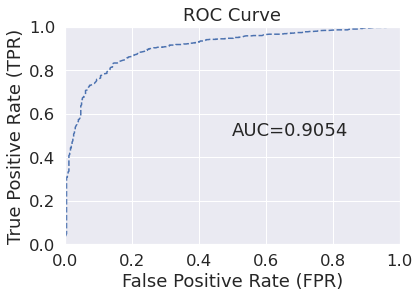

-----------------------------
Model ID:  GBM_model_python_1605362597414_1525
XVal Accuracy:  0.8274734260016353
Training time (ms):  22756
XVal AUC:  0.8782254728132387


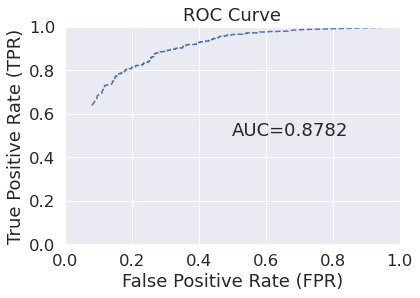

-----------------------------
Model ID:  GLM_model_python_1605423034668_20
XVal Accuracy:  0.8577269010629599
Training time (ms):  6048
XVal AUC:  0.9118498817966902


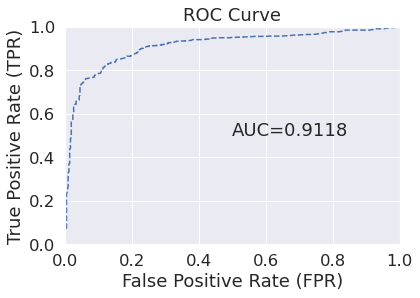

-----------------------------
Model ID:  GLM_model_python_1605362597414_1506
XVal Accuracy:  0.8086672117743254
Training time (ms):  216
XVal AUC:  0.8693484042553191


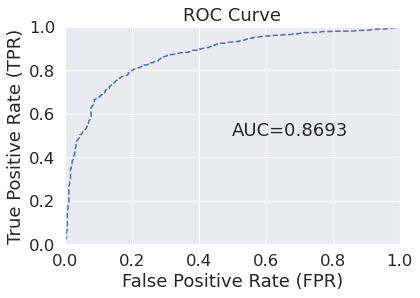

-----------------------------
Model ID:  NaiveBayes_model_python_1605423034668_1
XVal Accuracy:  0.7334423548650858
Training time (ms):  5211
XVal AUC:  0.7146276595744682


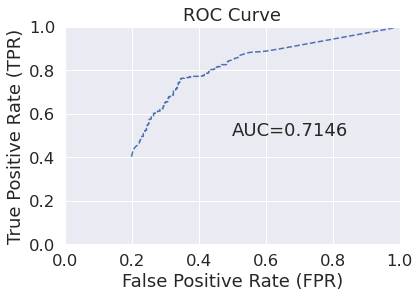

-----------------------------
Model ID:  NaiveBayes_model_python_1605362597414_1487
XVal Accuracy:  0.6745707277187244
Training time (ms):  130
XVal AUC:  0.62177304964539


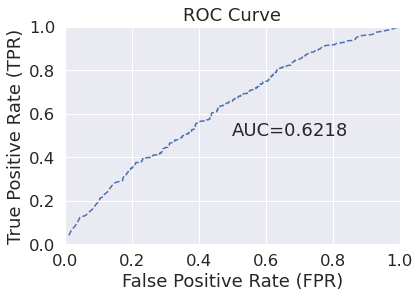

-----------------------------
Model ID:  XGBoost_model_python_1605423034668_274
XVal Accuracy:  0.866721177432543
Training time (ms):  9638
XVal AUC:  0.9238918439716312


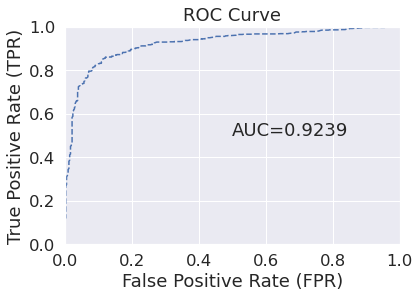

-----------------------------
Model ID:  XGBoost_model_python_1605362597414_1768
XVal Accuracy:  0.83892068683565
Training time (ms):  4348
XVal AUC:  0.8880614657210402


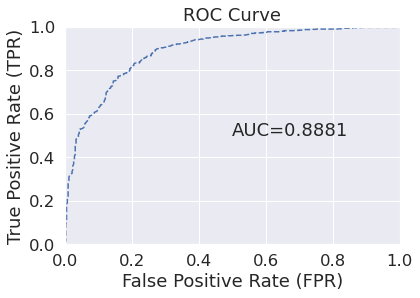

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_deeplearning
XVal Accuracy:  0.8086672117743254
Training time (ms):  54195
XVal AUC:  0.8633983451536642


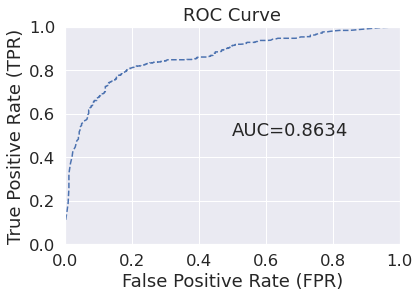

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_deeplearning
XVal Accuracy:  0.7391659852820932
Training time (ms):  280253
XVal AUC:  0.7148921394799055


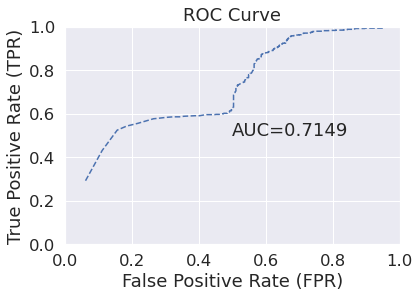

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_drf
XVal Accuracy:  0.8683565004088307
Training time (ms):  16388
XVal AUC:  0.9260268912529551


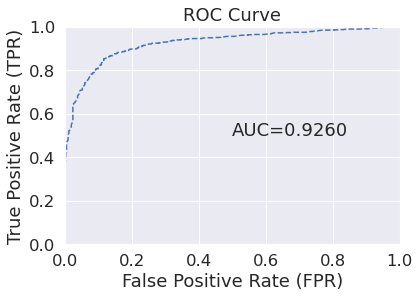

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_drf
XVal Accuracy:  0.8242027800490597
Training time (ms):  7132
XVal AUC:  0.880774231678487


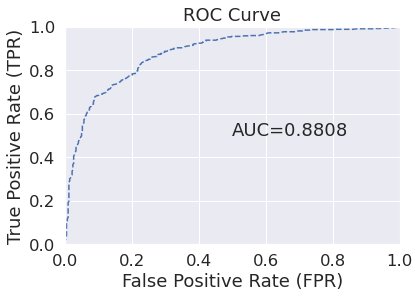

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_gbm
XVal Accuracy:  0.866721177432543
Training time (ms):  14372
XVal AUC:  0.9249010047281323


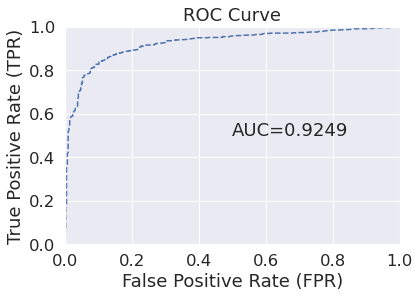

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_gbm
XVal Accuracy:  0.8086672117743254
Training time (ms):  12611
XVal AUC:  0.8498921394799054


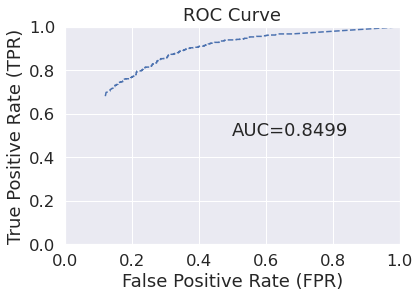

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_glm
XVal Accuracy:  0.874897792313982
Training time (ms):  13136
XVal AUC:  0.9231072695035462


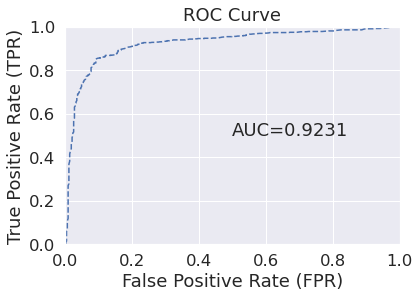

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_glm
XVal Accuracy:  0.8405560098119379
Training time (ms):  685
XVal AUC:  0.9017479314420803


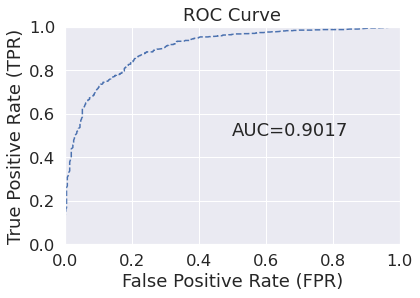

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_naivebayes
XVal Accuracy:  0.8634505314799673
Training time (ms):  12785
XVal AUC:  0.9184530141843972


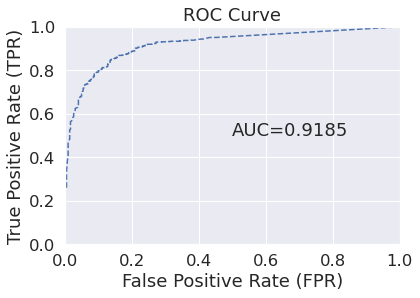

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_naivebayes
XVal Accuracy:  0.8454619787408013
Training time (ms):  655
XVal AUC:  0.8984471040189125


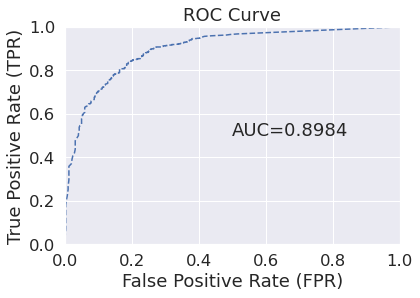

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_xgboost
XVal Accuracy:  0.8503679476696647
Training time (ms):  17681
XVal AUC:  0.9159352836879433


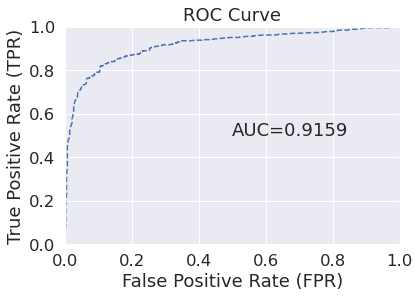

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_xgboost
XVal Accuracy:  0.8250204415372036
Training time (ms):  5528
XVal AUC:  0.8839967494089835


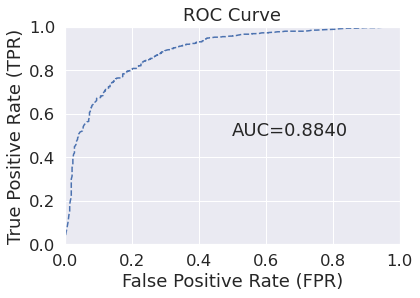

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_deeplearning
XVal Accuracy:  0.7481602616516762
Training time (ms):  47602
XVal AUC:  0.8082505910165484


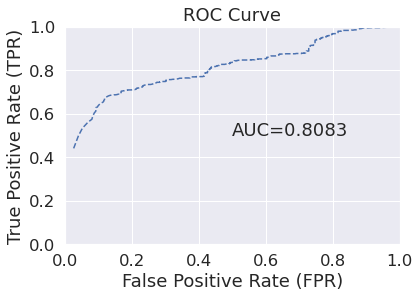

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_deeplearning
XVal Accuracy:  0.7269010629599346
Training time (ms):  279786
XVal AUC:  0.7530082742316785
-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_drf
XVal Accuracy:  0.8659035159443991
Training time (ms):  11379
XVal AUC:  0.9191282505910165
-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_drf
XVal Accuracy:  0.821749795584628
Training time (ms):  6638
XVal AUC:  0.8804920212765958
-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_gbm
XVal Accuracy:  0.866721177432543
Training time (ms):  11276
XVal AUC:  0.9223847517730496
-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_gbm
XVal Accuracy:  0.8062142273098937
Training time (ms):  11894
XVal AUC:  0.854057328605201


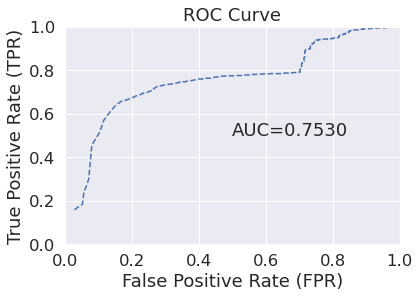

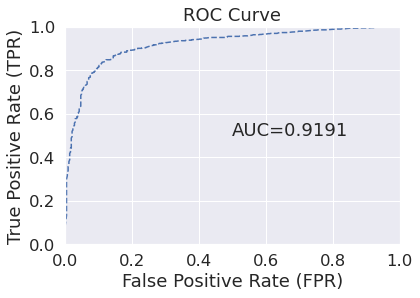

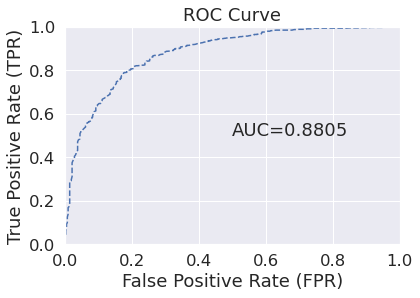

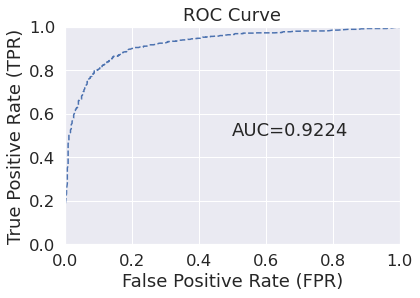

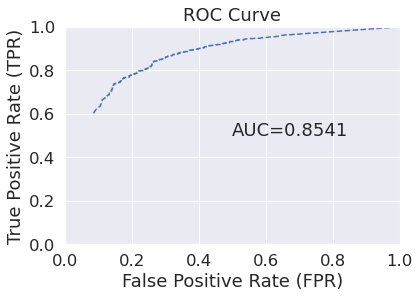

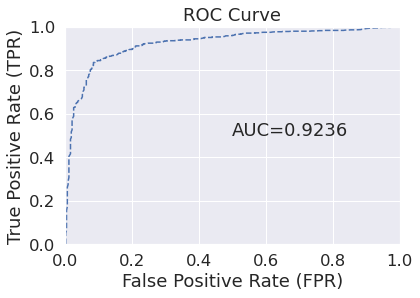

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_glm
XVal Accuracy:  0.8413736713000818
Training time (ms):  597
XVal AUC:  0.8965174349881797


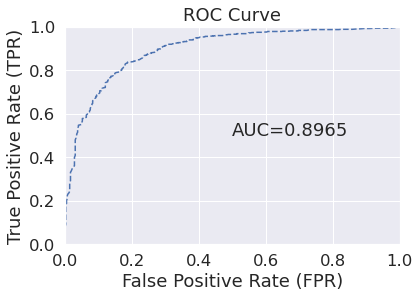

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_naivebayes
XVal Accuracy:  0.8618152085036794
Training time (ms):  9295
XVal AUC:  0.9221498226950354


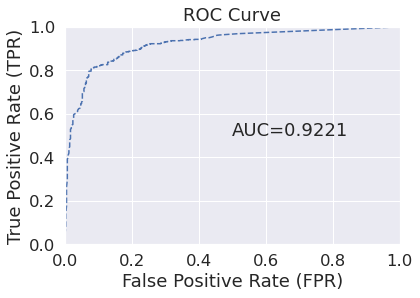

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_naivebayes
XVal Accuracy:  0.8405560098119379
Training time (ms):  601
XVal AUC:  0.8956368203309693


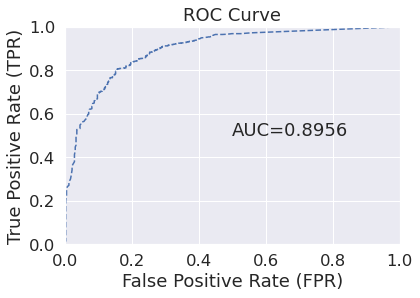

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_xgboost
XVal Accuracy:  0.8528209321340965
Training time (ms):  14069
XVal AUC:  0.9068676122931443


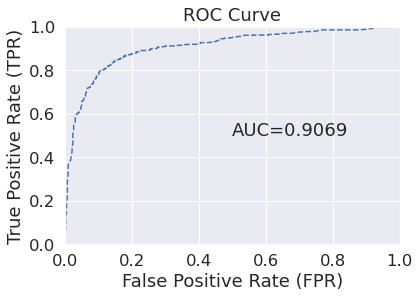

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_xgboost
XVal Accuracy:  0.8233851185609158
Training time (ms):  5439
XVal AUC:  0.8786244089834515


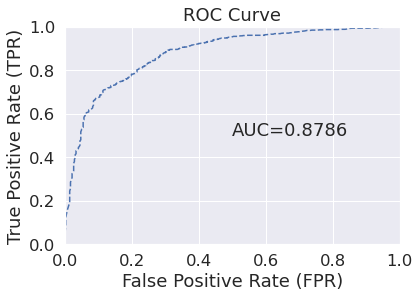

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_deeplearning
XVal Accuracy:  0.8282910874897792
Training time (ms):  45733
XVal AUC:  0.8788741134751773


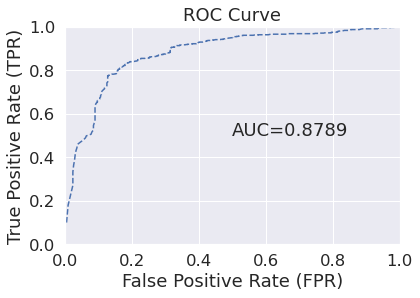

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_deeplearning
XVal Accuracy:  0.7031888798037612
Training time (ms):  338640
XVal AUC:  0.6323758865248227


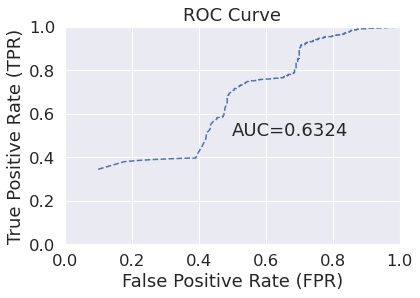

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_drf
XVal Accuracy:  0.8708094848732625
Training time (ms):  10068
XVal AUC:  0.9200059101654847


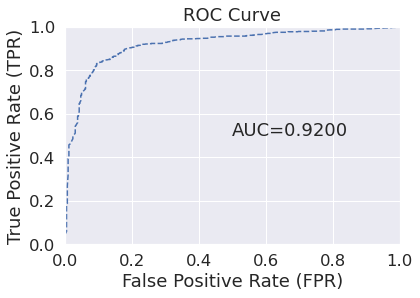

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_drf
XVal Accuracy:  0.8160261651676206
Training time (ms):  6518
XVal AUC:  0.8663593380614658


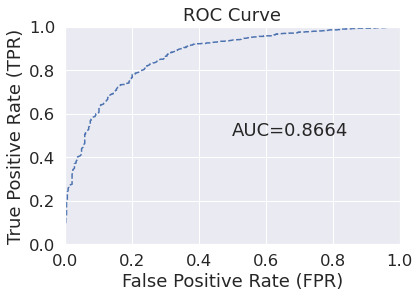

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_gbm
XVal Accuracy:  0.8618152085036794
Training time (ms):  10280
XVal AUC:  0.9218543144208038


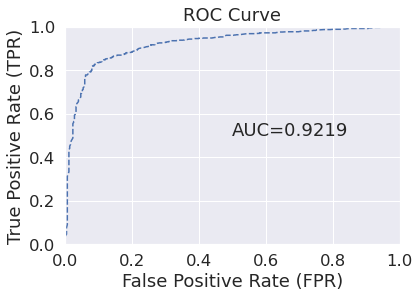

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_gbm
XVal Accuracy:  0.7923139820114473
Training time (ms):  11571
XVal AUC:  0.8412086288416076


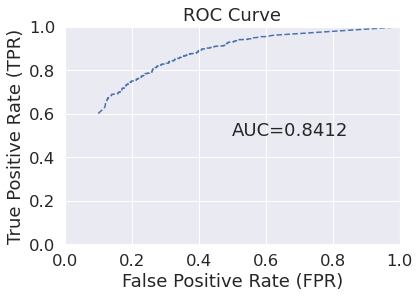

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_glm
XVal Accuracy:  0.866721177432543
Training time (ms):  8128
XVal AUC:  0.9242213356973995


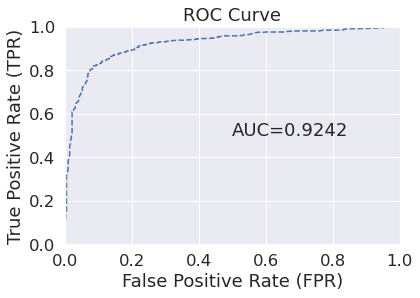

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_glm
XVal Accuracy:  0.8413736713000818
Training time (ms):  589
XVal AUC:  0.8967715721040189


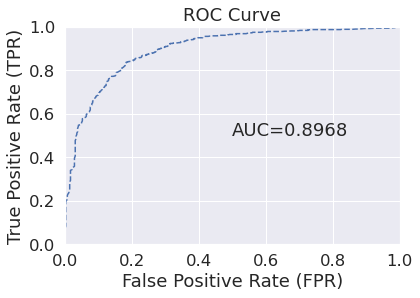

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_naivebayes
XVal Accuracy:  0.8683565004088307
Training time (ms):  7497
XVal AUC:  0.9242686170212766


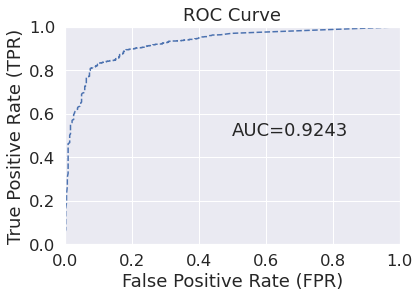

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_naivebayes
XVal Accuracy:  0.83892068683565
Training time (ms):  468
XVal AUC:  0.8972680260047281


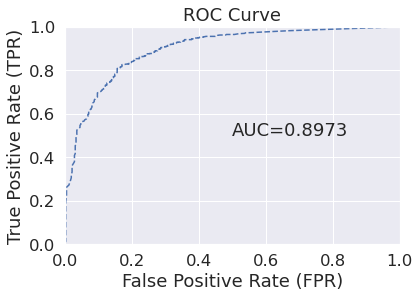

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_xgboost
XVal Accuracy:  0.8479149632052331
Training time (ms):  11570
XVal AUC:  0.9019355791962175


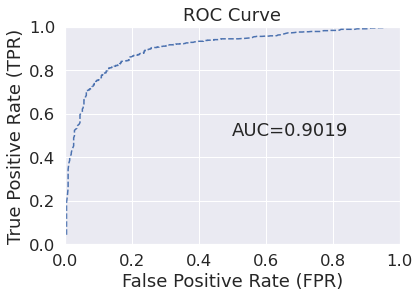

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_xgboost
XVal Accuracy:  0.8143908421913328
Training time (ms):  6247
XVal AUC:  0.8744400118203309


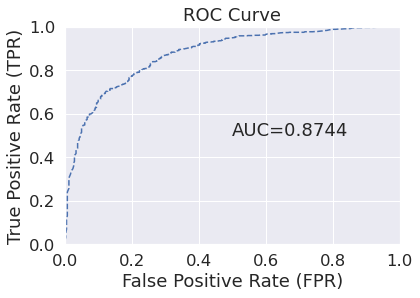

-----------------------------


In [130]:
import time


for a_mdl in all_final_models:
    xval_perf = a_mdl.model_performance(xval=True)

    time.sleep(3)

    valid_perf = a_mdl.model_performance(valid=True)



    print('Model ID: ', a_mdl.model_id)
    print('XVal Accuracy: ', xval_perf.accuracy()[0][1])
    print('Training time (ms): ', a_mdl.run_time)
    print('XVal AUC: ', xval_perf.auc())

    time.sleep(3)
    
    xval_perf.plot()


    # print('Validation data AUC: ', valid_perf.auc())
    # print('Validation data Accuracy: ', valid_perf.accuracy()[0][1])


    time.sleep(3)

    # valid_perf.plot()



    print("-----------------------------")

Model ID:  DeepLearning_model_python_1605423034668_341
Validation data AUC:  0.6180890841107924
Validation data Accuracy:  0.6786427145708582


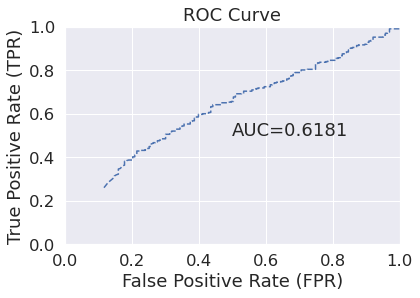

-----------------------------
Model ID:  DeepLearning_model_python_1605362597414_3340
Validation data AUC:  0.5544977674519911
Validation data Accuracy:  0.6746506986027944


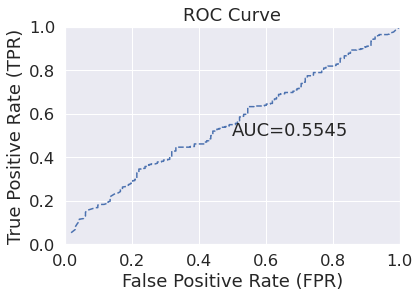

-----------------------------
Model ID:  DRF_model_python_1605423034668_386
Validation data AUC:  0.6008821287254511
Validation data Accuracy:  0.6806387225548902


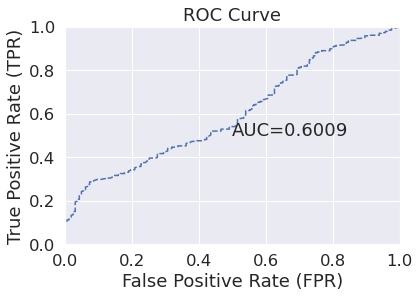

-----------------------------
Model ID:  DRF_model_python_1605362597414_2415
Validation data AUC:  0.5821051294151813
Validation data Accuracy:  0.6866267465069861


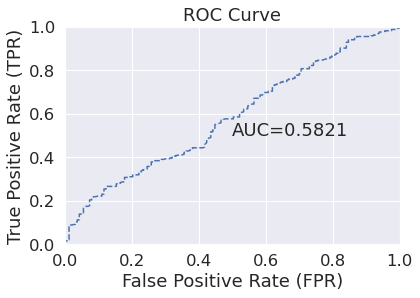

-----------------------------
Model ID:  GBM_model_python_1605423034668_39
Validation data AUC:  0.684212436925981
Validation data Accuracy:  0.7005988023952096


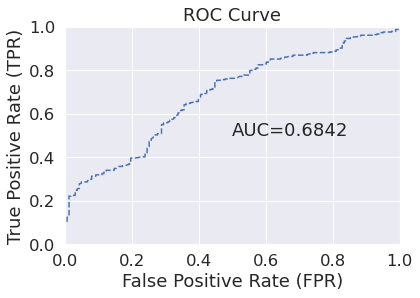

-----------------------------
Model ID:  GBM_model_python_1605362597414_1525
Validation data AUC:  0.5569935020147384
Validation data Accuracy:  0.6826347305389222


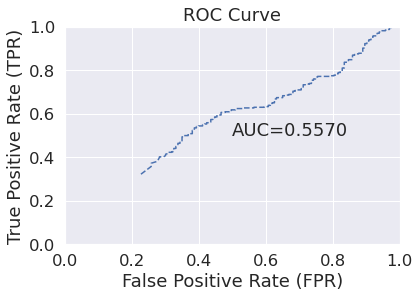

-----------------------------
Model ID:  GLM_model_python_1605423034668_20
Validation data AUC:  0.7188169310632736
Validation data Accuracy:  0.6906187624750499


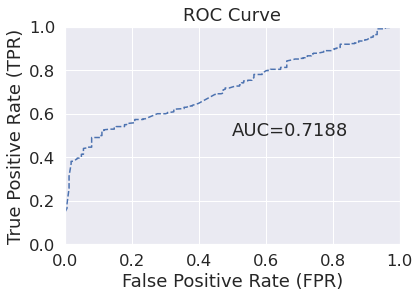

-----------------------------
Model ID:  GLM_model_python_1605362597414_1506
Validation data AUC:  0.6266381094130032
Validation data Accuracy:  0.6786427145708582


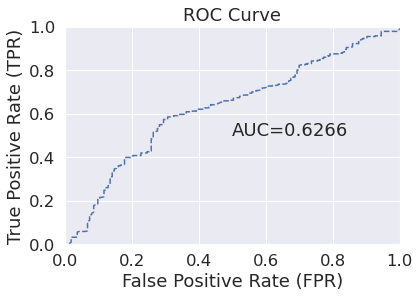

-----------------------------
Model ID:  NaiveBayes_model_python_1605423034668_1
Validation data AUC:  0.6037862562166479
Validation data Accuracy:  0.6946107784431138


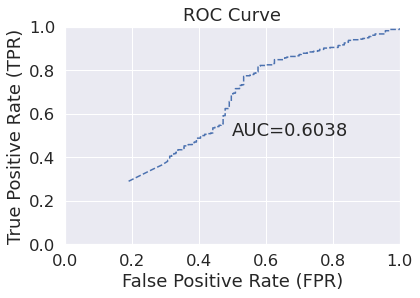

-----------------------------
Model ID:  NaiveBayes_model_python_1605362597414_1487
Validation data AUC:  0.5736650088938905
Validation data Accuracy:  0.6786427145708582


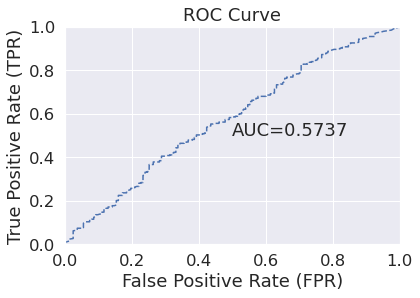

-----------------------------
Model ID:  XGBoost_model_python_1605423034668_274
Validation data AUC:  0.7019820670127418
Validation data Accuracy:  0.6926147704590818


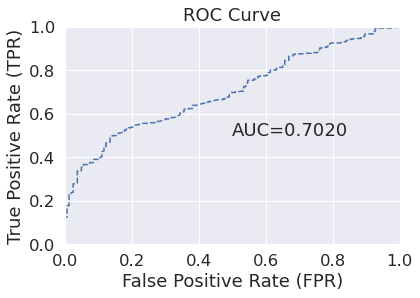

-----------------------------
Model ID:  XGBoost_model_python_1605362597414_1768
Validation data AUC:  0.6006189421715613
Validation data Accuracy:  0.6746506986027944


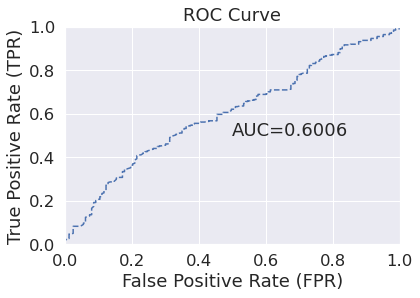

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_deeplearning
Validation data AUC:  0.7236450430173885
Validation data Accuracy:  0.6906187624750499


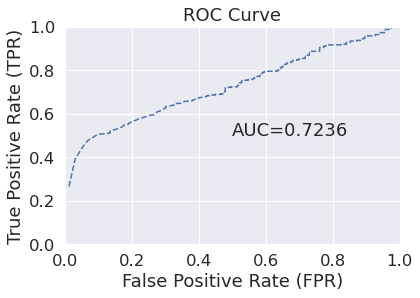

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_deeplearning
Validation data AUC:  0.6143227937706466
Validation data Accuracy:  0.6766467065868264


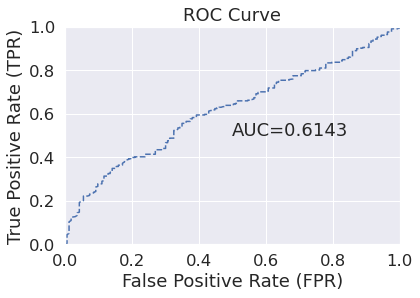

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_drf
Validation data AUC:  0.699050713326315
Validation data Accuracy:  0.6846307385229541


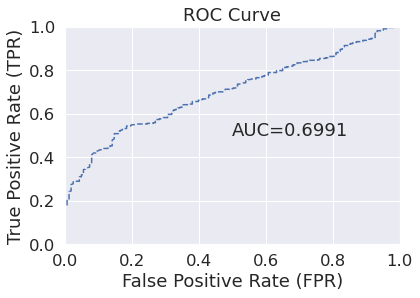

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_drf
Validation data AUC:  0.5751079972410789
Validation data Accuracy:  0.6766467065868264


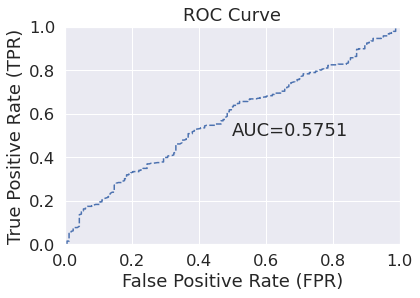

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_gbm
Validation data AUC:  0.6927342360329619
Validation data Accuracy:  0.6906187624750499


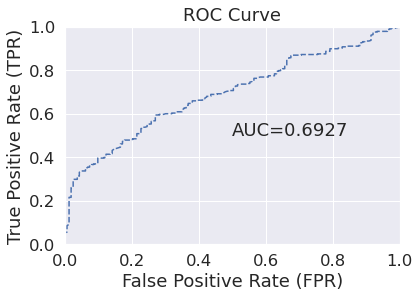

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_gbm
Validation data AUC:  0.5934584528260791
Validation data Accuracy:  0.6746506986027944


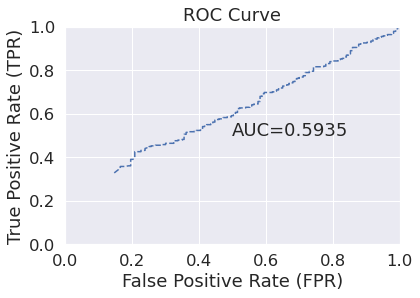

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_glm
Validation data AUC:  0.7093875921152939
Validation data Accuracy:  0.6926147704590818


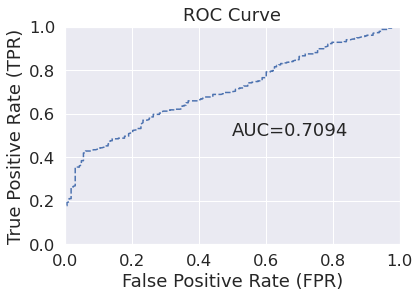

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_glm
Validation data AUC:  0.6213834537336189
Validation data Accuracy:  0.6746506986027944


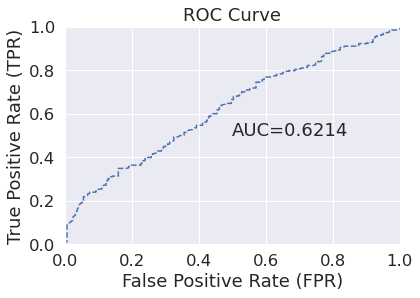

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_naivebayes
Validation data AUC:  0.6918085453951428
Validation data Accuracy:  0.6946107784431138


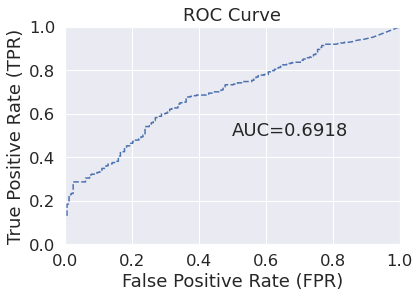

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_naivebayes
Validation data AUC:  0.6091044396849021
Validation data Accuracy:  0.6746506986027944


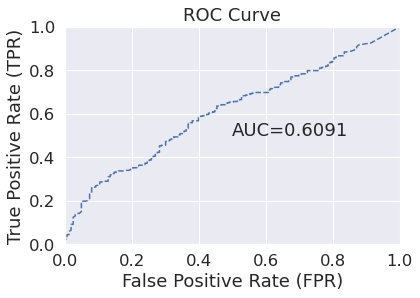

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_xgboost
Validation data AUC:  0.650896649362907
Validation data Accuracy:  0.6826347305389222


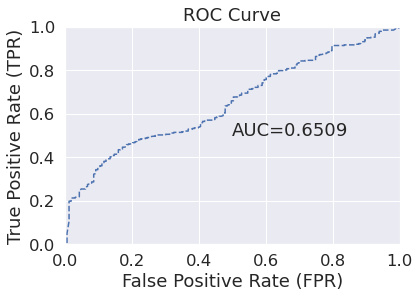

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_xgboost
Validation data AUC:  0.5999473626892221
Validation data Accuracy:  0.6786427145708582


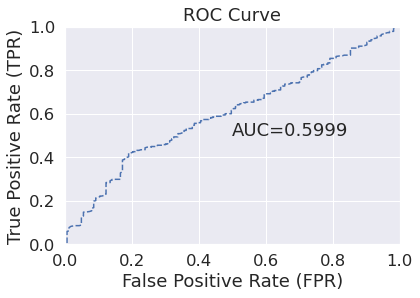

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_deeplearning
Validation data AUC:  0.6794206265655063
Validation data Accuracy:  0.6946107784431138


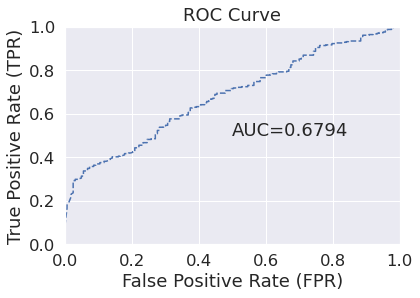

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_deeplearning
Validation data AUC:  0.5992485570116528
Validation data Accuracy:  0.6746506986027944


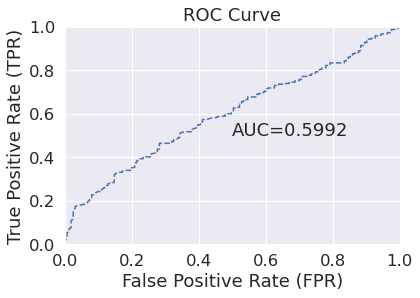

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_drf
Validation data AUC:  0.6710349584346753
Validation data Accuracy:  0.6866267465069861


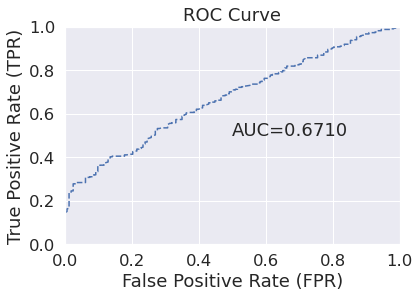

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_drf
Validation data AUC:  0.5761970450502777
Validation data Accuracy:  0.6806387225548902


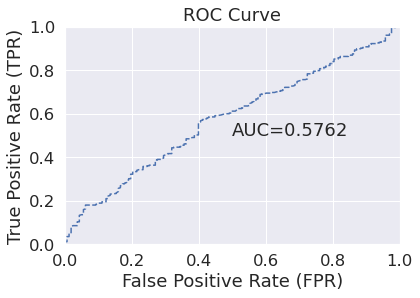

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_gbm
Validation data AUC:  0.6637927905035031
Validation data Accuracy:  0.6786427145708582


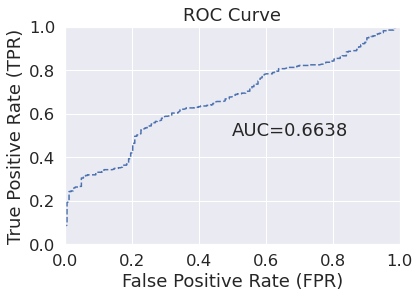

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_gbm
Validation data AUC:  0.5840744908701492
Validation data Accuracy:  0.6806387225548902


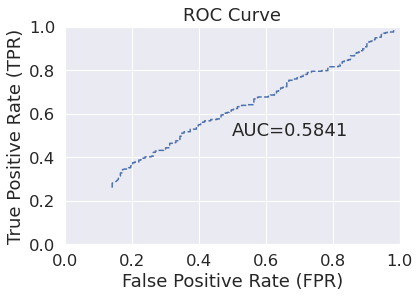

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_glm
Validation data AUC:  0.6710712600283153
Validation data Accuracy:  0.6946107784431138


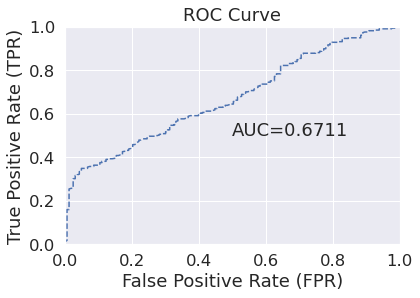

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_glm
Validation data AUC:  0.6081696736486731
Validation data Accuracy:  0.6746506986027944


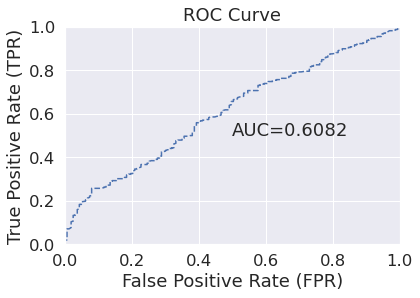

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_naivebayes
Validation data AUC:  0.676806911823429
Validation data Accuracy:  0.6946107784431138


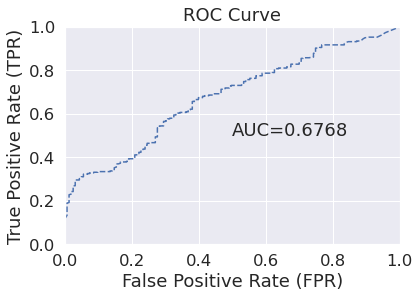

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_naivebayes
Validation data AUC:  0.5926507423675899
Validation data Accuracy:  0.6746506986027944


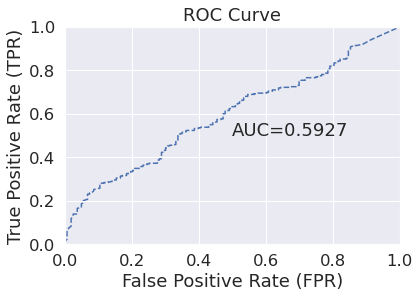

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_xgboost
Validation data AUC:  0.6314480705702981
Validation data Accuracy:  0.6806387225548902


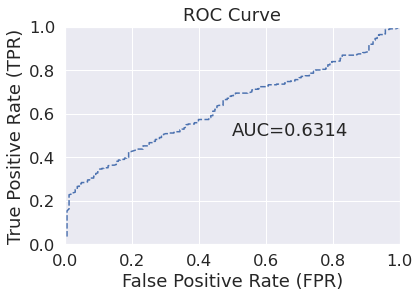

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_xgboost
Validation data AUC:  0.5822231095945112
Validation data Accuracy:  0.6826347305389222


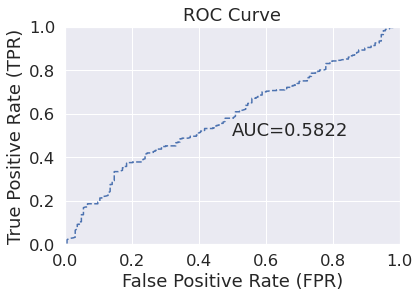

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_deeplearning
Validation data AUC:  0.6776055468835083
Validation data Accuracy:  0.6926147704590818


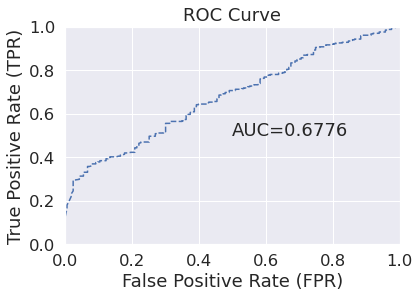

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_deeplearning
Validation data AUC:  0.6149943732529858
Validation data Accuracy:  0.6746506986027944


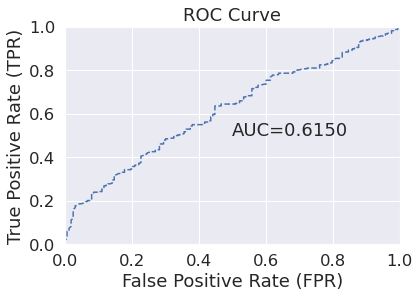

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_drf
Validation data AUC:  0.6450157911932334
Validation data Accuracy:  0.6806387225548902


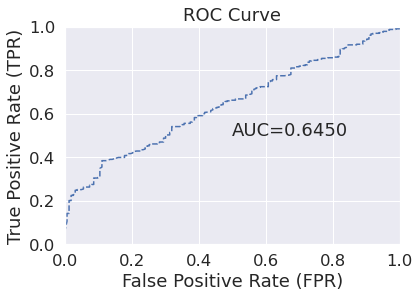

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_drf
Validation data AUC:  0.577776164373616
Validation data Accuracy:  0.6746506986027944


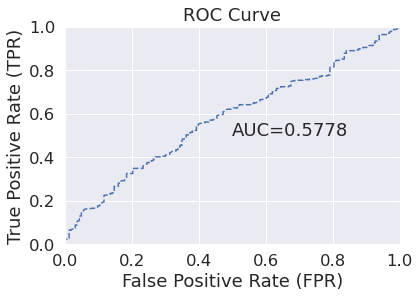

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_gbm
Validation data AUC:  0.6578665553417795
Validation data Accuracy:  0.6826347305389222


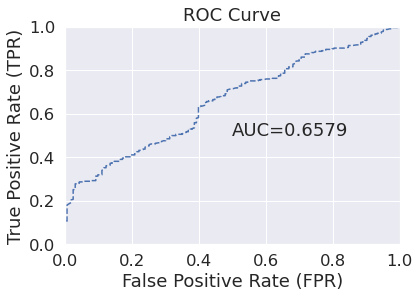

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_gbm
Validation data AUC:  0.5681834682542564
Validation data Accuracy:  0.6786427145708582


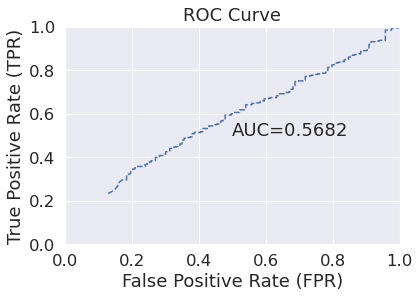

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_glm
Validation data AUC:  0.6919991287617526
Validation data Accuracy:  0.6966067864271457


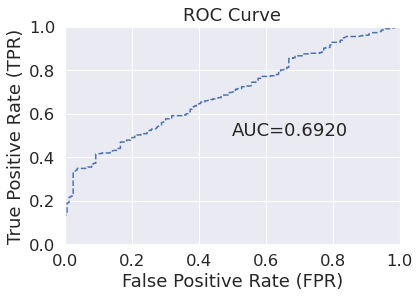

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_glm
Validation data AUC:  0.6095309834101716
Validation data Accuracy:  0.6746506986027944


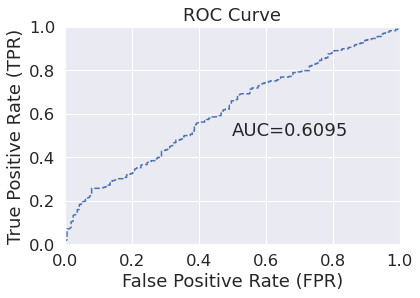

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_naivebayes
Validation data AUC:  0.6688477874178677
Validation data Accuracy:  0.6846307385229541


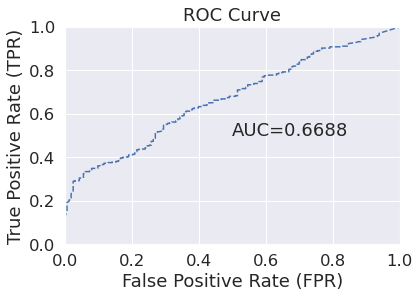

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_naivebayes
Validation data AUC:  0.6125530910806984
Validation data Accuracy:  0.6746506986027944


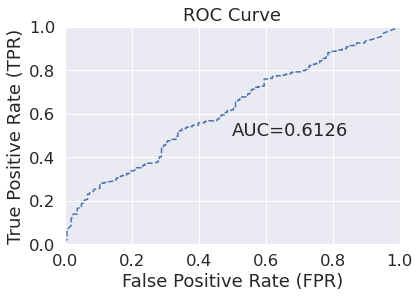

-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_xgboost
Validation data AUC:  0.6451428467709732
Validation data Accuracy:  0.6786427145708582


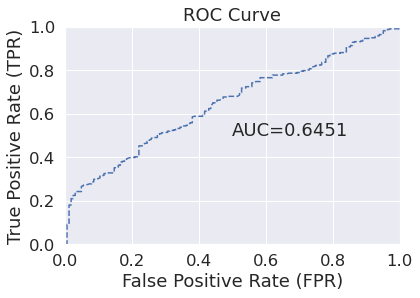

-----------------------------
Model ID:  stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_xgboost
Validation data AUC:  0.5808164228409627
Validation data Accuracy:  0.6746506986027944


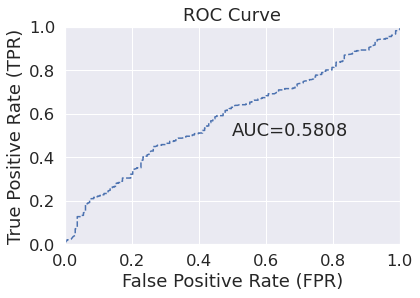

-----------------------------


In [43]:
for a_mdl in all_final_models:
    xval_perf = a_mdl.model_performance(xval=True)

    time.sleep(3)

    valid_perf = a_mdl.model_performance(valid=True)



    print('Model ID: ', a_mdl.model_id)
    # print('XVal Accuracy: ', xval_perf.accuracy()[0][1])
    # print('Training time (ms): ', a_mdl.run_time)
    # print('XVal AUC: ', xval_perf.auc())

    time.sleep(1)
    
    # xval_perf.plot()


    print('Validation data AUC: ', valid_perf.auc())
    print('Validation data Accuracy: ', valid_perf.accuracy()[0][1])


    time.sleep(3)

    valid_perf.plot()



    print("-----------------------------")

In [9]:
import time


all_final_model_metrics = []


for a_mdl in all_final_models:
    xval_perf = a_mdl.model_performance(xval=True)


    valid_perf = a_mdl.model_performance(valid=True)

    perf_dict = {}

    perf_dict['model_id'] = a_mdl.model_id
    perf_dict['XVal Accuracy'] = xval_perf.accuracy()[0][1]
    perf_dict['Training time (ms)'] = a_mdl.run_time
    perf_dict['XVal AUC'] = xval_perf.auc()
    perf_dict['Validation data AUC'] = valid_perf.auc()
    perf_dict['Validation data Accuracy'] = valid_perf.accuracy()[0][1]
    all_final_model_metrics.append([a_mdl, perf_dict])


    print('Model ID: ', a_mdl.model_id)


    print("-----------------------------")

Model ID:  DeepLearning_model_python_1605423034668_341
-----------------------------
Model ID:  DeepLearning_model_python_1605362597414_3340
-----------------------------
Model ID:  DRF_model_python_1605423034668_386
-----------------------------
Model ID:  DRF_model_python_1605362597414_2415
-----------------------------
Model ID:  GBM_model_python_1605423034668_39
-----------------------------
Model ID:  GBM_model_python_1605362597414_1525
-----------------------------
Model ID:  GLM_model_python_1605423034668_20
-----------------------------
Model ID:  GLM_model_python_1605362597414_1506
-----------------------------
Model ID:  NaiveBayes_model_python_1605423034668_1
-----------------------------
Model ID:  NaiveBayes_model_python_1605362597414_1487
-----------------------------
Model ID:  XGBoost_model_python_1605423034668_274
-----------------------------
Model ID:  XGBoost_model_python_1605362597414_1768
-----------------------------
Model ID:  stacked_ensemble_ALL_FEATURES_ALL_M

In [10]:

for mdl_tuple in all_final_model_metrics:
    perf_dict = mdl_tuple[1]
    pp = pprint.PrettyPrinter(indent=4)
    pp.pprint(perf_dict)

{   'Training time (ms)': 470361,
    'Validation data AUC': 0.6180890841107924,
    'Validation data Accuracy': 0.6786427145708582,
    'XVal AUC': 0.9027482269503546,
    'XVal Accuracy': 0.8511856091578087,
    'model_id': 'DeepLearning_model_python_1605423034668_341'}
{   'Training time (ms)': 92889,
    'Validation data AUC': 0.5544977674519911,
    'Validation data Accuracy': 0.6746506986027944,
    'XVal AUC': 0.8209884751773049,
    'XVal Accuracy': 0.7710547833197057,
    'model_id': 'DeepLearning_model_python_1605362597414_3340'}
{   'Training time (ms)': 1900902,
    'Validation data AUC': 0.6008821287254511,
    'Validation data Accuracy': 0.6806387225548902,
    'XVal AUC': 0.9106057919621748,
    'XVal Accuracy': 0.856909239574816,
    'model_id': 'DRF_model_python_1605423034668_386'}
{   'Training time (ms)': 4970,
    'Validation data AUC': 0.5821051294151813,
    'Validation data Accuracy': 0.6866267465069861,
    'XVal AUC': 0.8844089834515367,
    'XVal Accuracy': 0.

# Metrics for all models



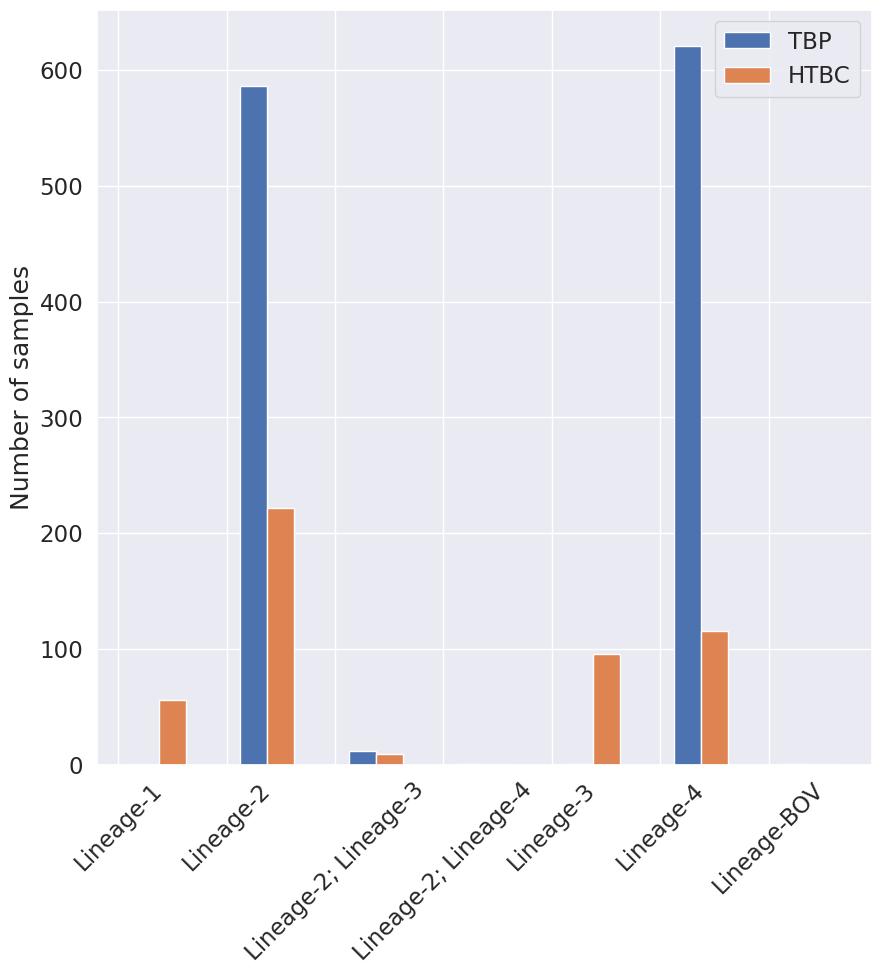

In [67]:
# TODO: MOVE THIS TO EDA

# libraries
import numpy as np
import matplotlib.pyplot as plt
 

plt.figure(
    figsize=(10,10),
    dpi=100)

# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [0, 586, 12, 1, 1, 621, 1]


import json
import pprint

pca300_auc_list = []

for mdl_tuple in all_final_model_metrics[1:12:2]:
    perf_dict = mdl_tuple[1]
    pca300_auc_list.append(perf_dict['XVal AUC'])
    pp.pprint(perf_dict['model_id'])

bars2 = [56, 222, 9, 0, 96, 116, 0]


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='TBP')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='HTBC')
 
# Add xticks on the middle of the group bars
# plt.xlabel('Cohort Drug Resistance Profile', fontweight='bold')
plt.xticks([r - barWidth for r in range(len(bars1))], ['Lineage-1', 'Lineage-2', 'Lineage-2; Lineage-3', 'Lineage-2; Lineage-4', 'Lineage-3', 'Lineage-4', 'Lineage-BOV'])
plt.xticks(rotation=45)

plt.ylabel('Number of samples') 

# Create legend & Show graphic
plt.legend()
plt.show()


## AUC Performance for all Top models


'DeepLearning_model_python_1605423034668_341'
'DRF_model_python_1605423034668_386'
'GBM_model_python_1605423034668_39'
'GLM_model_python_1605423034668_20'
'NaiveBayes_model_python_1605423034668_1'
'XGBoost_model_python_1605423034668_274'
'DeepLearning_model_python_1605362597414_3340'
'DRF_model_python_1605362597414_2415'
'GBM_model_python_1605362597414_1525'
'GLM_model_python_1605362597414_1506'
'NaiveBayes_model_python_1605362597414_1487'
'XGBoost_model_python_1605362597414_1768'


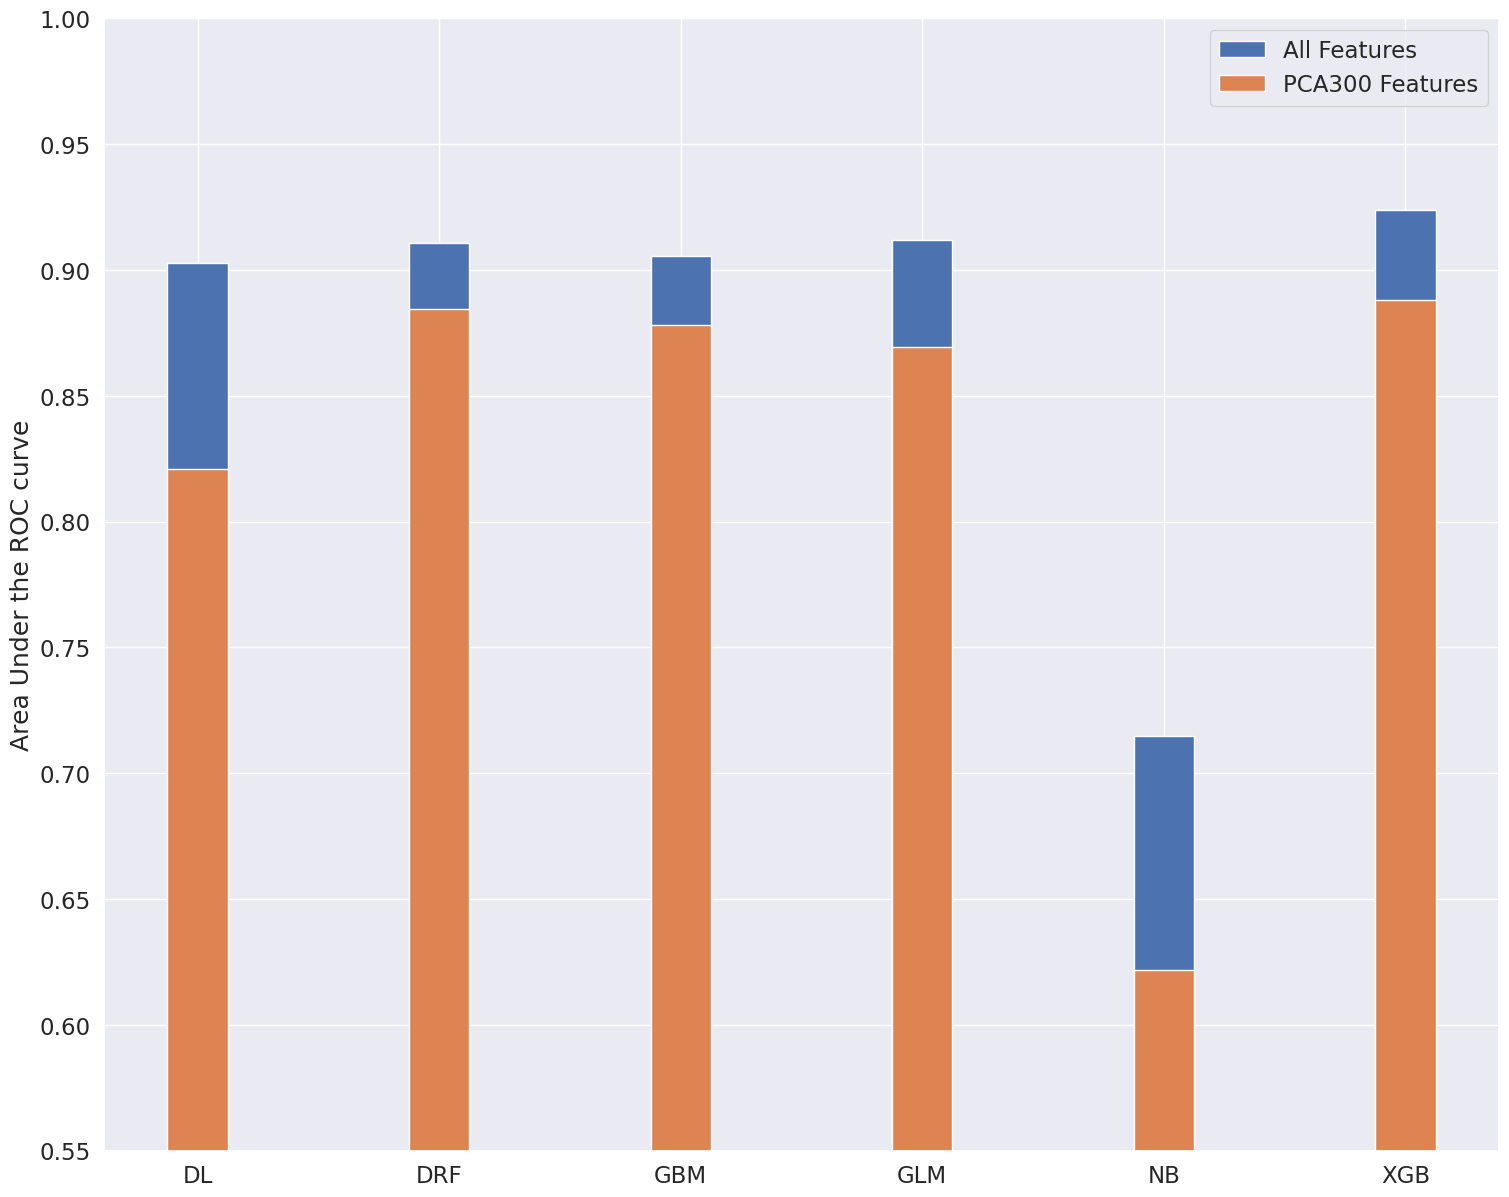

In [44]:
# NOTE: Performance of Top Models

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd

import json
import pprint

 

 
fig = plt.figure(
    figsize=(18,15),
    dpi=100)

ax = fig.add_subplot(1, 1, 1)


# set width of bar
barWidth = 0.25
 

all_features_auc_list = []

for mdl_tuple in all_final_model_metrics[0:12:2]:
    perf_dict = mdl_tuple[1]
    all_features_auc_list.append(perf_dict['XVal AUC'])
    pp.pprint(perf_dict['model_id'])


bars1 = all_features_auc_list



pca300_auc_list = []

for mdl_tuple in all_final_model_metrics[1:12:2]:
    perf_dict = mdl_tuple[1]
    pca300_auc_list.append(perf_dict['XVal AUC'])
    pp.pprint(perf_dict['model_id'])


bars2 =pca300_auc_list

# HTBC-Resistant
# bars3 = [21, 156, 0, 7, 87, 67]
# HTBC-Sensitive
# bars4 = [35, 66, 0, 2, 9, 49]


# # Heights of bars1 + bars2
# bars12_h = np.add(bars1, bars2).tolist()
# bars34_h = np.add(bars3, bars4).tolist()
 


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 

# Create brown bars
plt.bar(r1, bars1, edgecolor='white', width=barWidth, label='All Features')
# Create green bars (middle), on top of the firs ones
plt.bar(r1, bars2, bottom=0, edgecolor='white', width=barWidth, label='PCA300 Features')

 

# # Create brown bars
# plt.bar(r2, bars3, edgecolor='white', width=barWidth, label='HTBC-Resistant')
# # Create green bars (middle), on top of the firs ones
# plt.bar(r2, bars4, bottom=bars3, edgecolor='white', width=barWidth, label='HTBC-Sensitive')

 

# Custom X axis
plt.xticks([r1 for r1 in range(len(bars1))], ['DL', 'DRF', 'GBM', 'GLM', 'NB', 'XGB'])

# plt.xticks(rotation=45)

 
plt.ylabel('Area Under the ROC curve') 
# plt.xlabel('Class of Algorithms') 

ax.set_ylim(0.55, 1)



# Show graphic
plt.legend()
plt.show()


## Accuracy Performance for all Top models



'DeepLearning_model_python_1605423034668_341'
'DRF_model_python_1605423034668_386'
'GBM_model_python_1605423034668_39'
'GLM_model_python_1605423034668_20'
'NaiveBayes_model_python_1605423034668_1'
'XGBoost_model_python_1605423034668_274'
'DeepLearning_model_python_1605362597414_3340'
'DRF_model_python_1605362597414_2415'
'GBM_model_python_1605362597414_1525'
'GLM_model_python_1605362597414_1506'
'NaiveBayes_model_python_1605362597414_1487'
'XGBoost_model_python_1605362597414_1768'


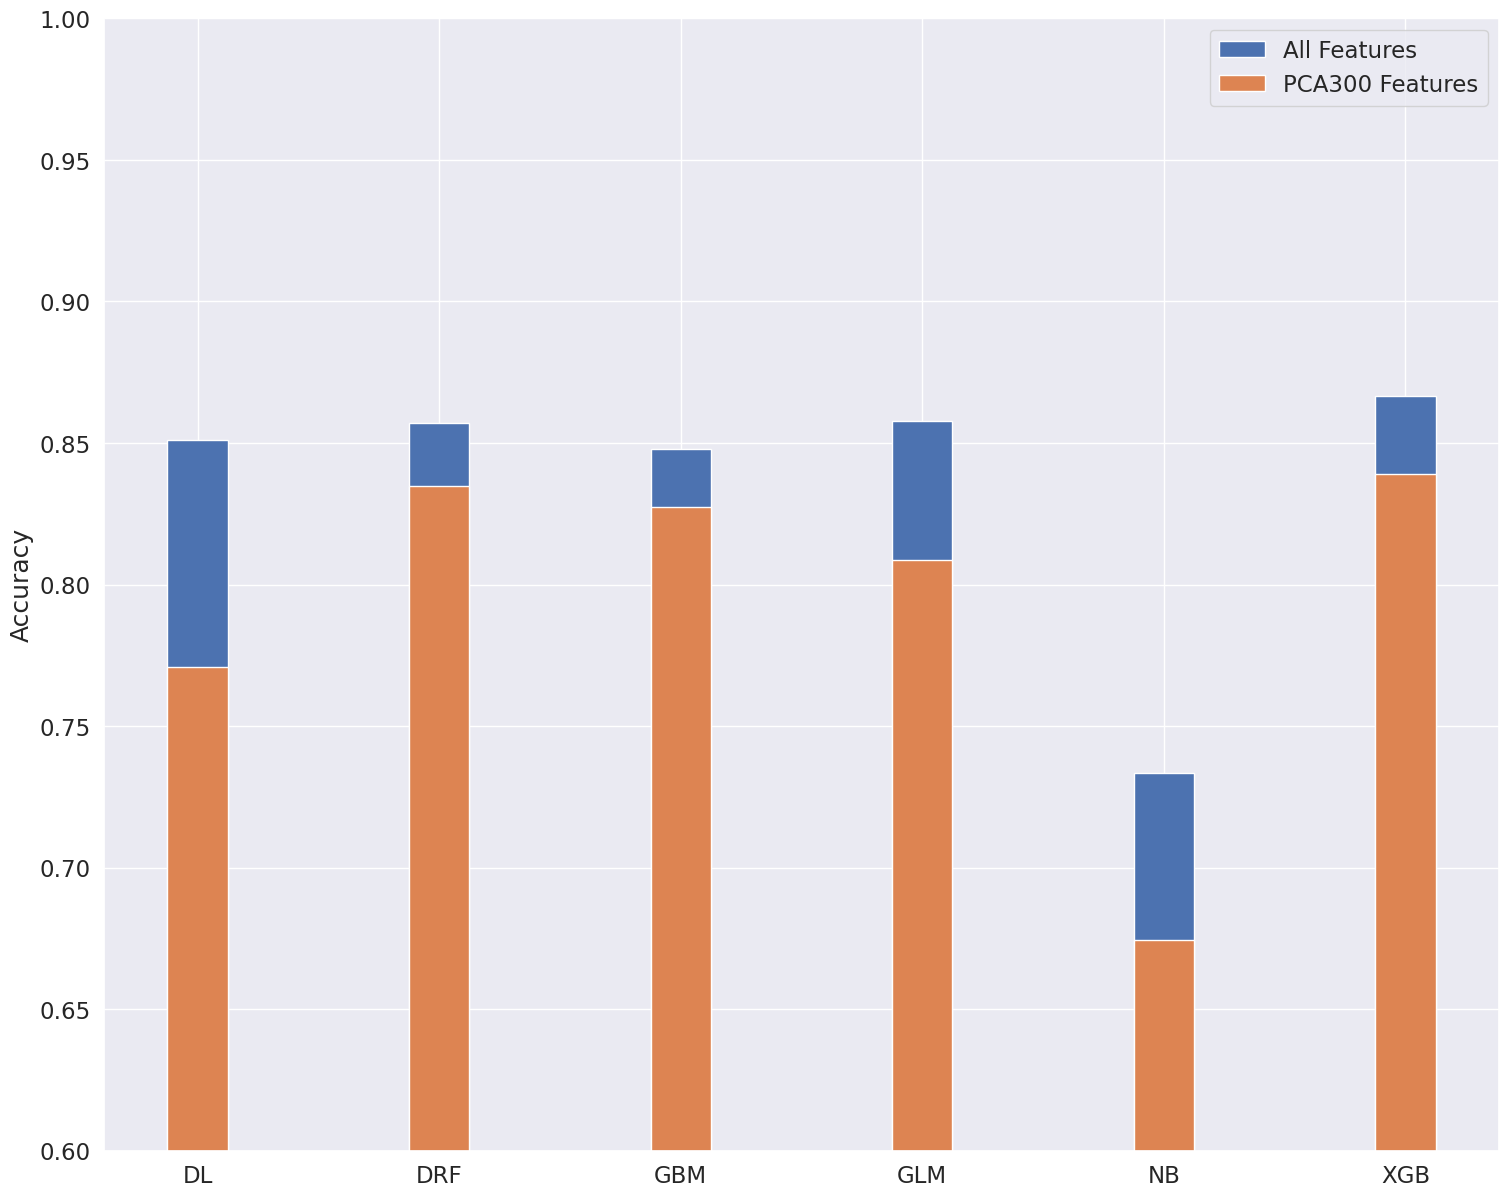

In [43]:
# NOTE: Performance of Top Models

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd

import json
import pprint

 

 
fig = plt.figure(
    figsize=(18,15),
    dpi=100)

ax = fig.add_subplot(1, 1, 1)


# set width of bar
barWidth = 0.25
 

all_features_accuracy_list = []

for mdl_tuple in all_final_model_metrics[0:12:2]:
    perf_dict = mdl_tuple[1]
    all_features_accuracy_list.append(perf_dict['XVal Accuracy'])
    pp.pprint(perf_dict['model_id'])


bars1 = all_features_accuracy_list



pca300_accuracy_list = []

for mdl_tuple in all_final_model_metrics[1:12:2]:
    perf_dict = mdl_tuple[1]
    pca300_accuracy_list.append(perf_dict['XVal Accuracy'])
    pp.pprint(perf_dict['model_id'])


bars2 =pca300_accuracy_list

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 

# Create brown bars
plt.bar(r1, bars1, edgecolor='white', width=barWidth, label='All Features')
# Create green bars (middle), on top of the firs ones
plt.bar(r1, bars2, bottom=0, edgecolor='white', width=barWidth, label='PCA300 Features')

 

# Custom X axis
plt.xticks([r1 for r1 in range(len(bars1))], ['DL', 'DRF', 'GBM', 'GLM', 'NB', 'XGB'])

# plt.xticks(rotation=45)

 
plt.ylabel('Accuracy') 
# plt.xlabel('Class of Algorithms') 

ax.set_ylim(0.6, 1)



# Show graphic
plt.legend()
plt.show()

## Time Performance for all Top Models


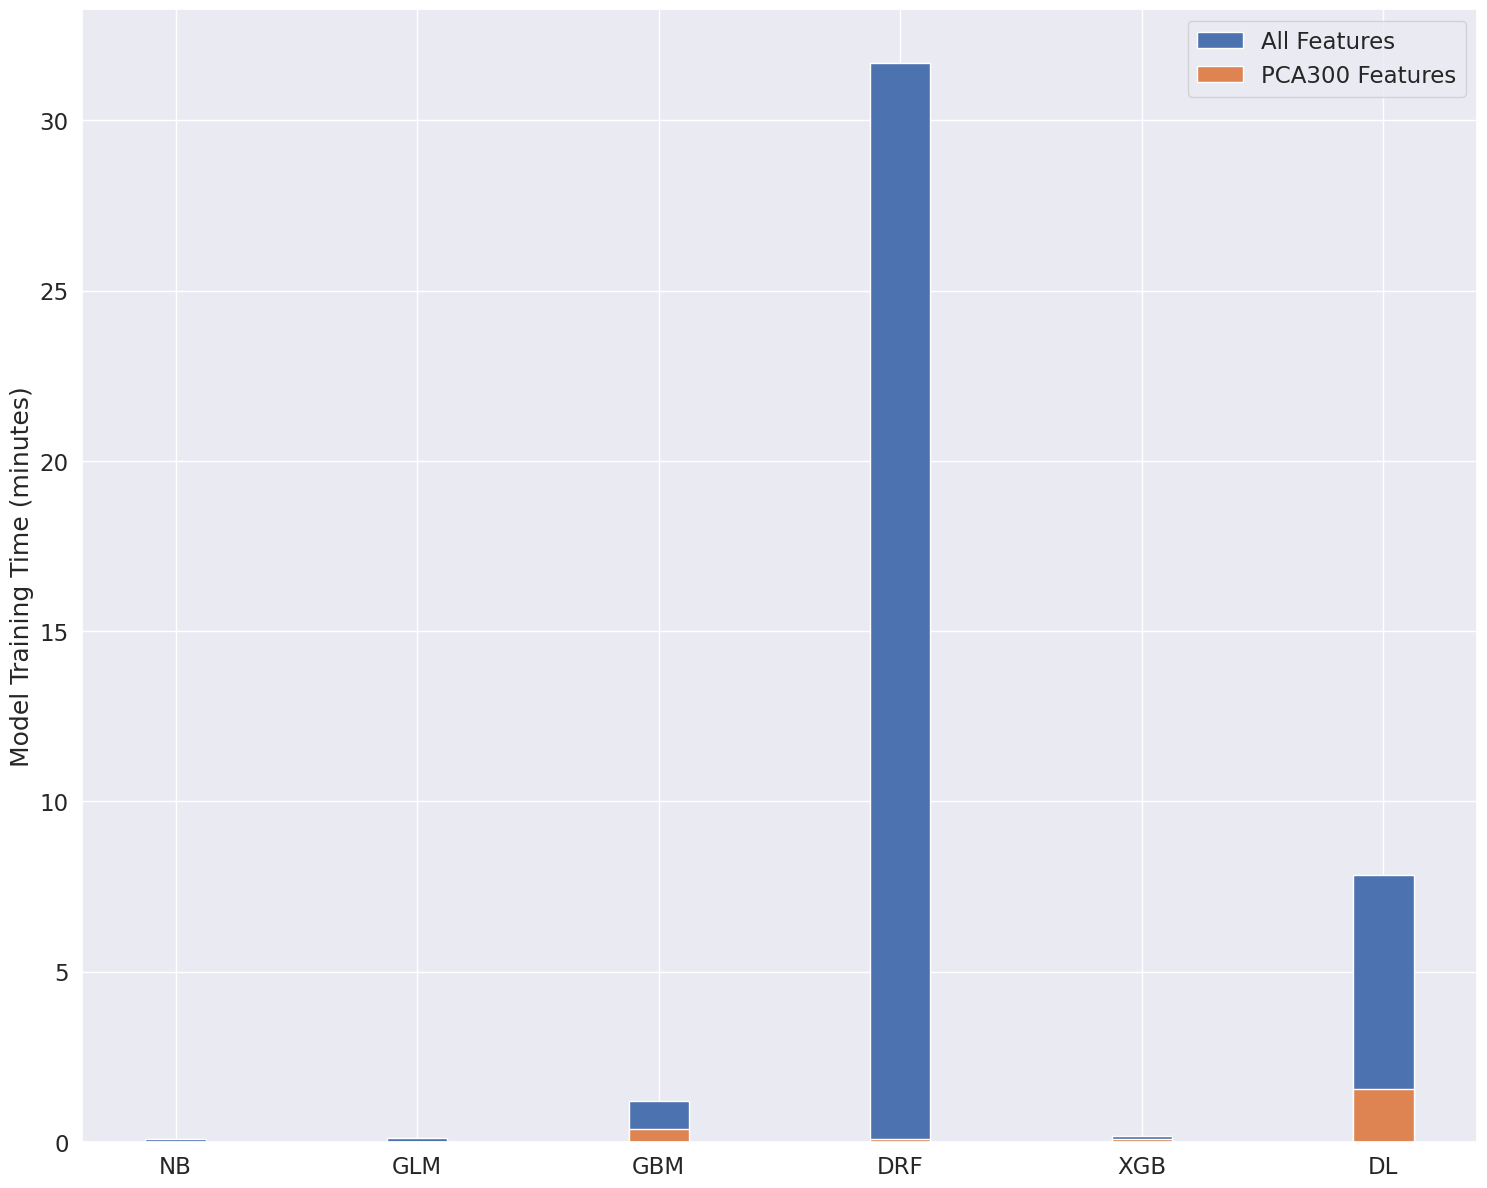

In [40]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 

 
fig = plt.figure(
    figsize=(18,15),
    dpi=100)

ax = fig.add_subplot(1, 1, 1)


# set width of bar
barWidth = 0.25
 



bars1 = list(map(lambda x: millis_to_minutes(x), 
[5211, 6048, 71120, 1900902, 9638, 470361]
))



bars2 = list(map(lambda x: millis_to_minutes(x), 
[130, 216, 22756, 4970, 4348, 92889]
))


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 

# Create brown bars
plt.bar(r1, bars1, edgecolor='white', width=barWidth, label='All Features')
# Create green bars (middle), on top of the firs ones
plt.bar(r1, bars2, bottom=0, edgecolor='white', width=barWidth, label='PCA300 Features')

 

# Custom X axis
plt.xticks([r1 for r1 in range(len(bars1))], ['DL', 'DRF', 'GBM', 'GLM', 'NB', 'XGB'])

# plt.xticks(rotation=45)

 
plt.ylabel('Model Training Time (minutes)') 
# plt.xlabel('Class of Algorithms') 

# ax.set_ylim(0.5, 1)



# Show graphic
plt.legend()
plt.show()


'DeepLearning_model_python_1605423034668_341'
'DRF_model_python_1605423034668_386'
'GBM_model_python_1605423034668_39'
'GLM_model_python_1605423034668_20'
'NaiveBayes_model_python_1605423034668_1'
'XGBoost_model_python_1605423034668_274'
'DeepLearning_model_python_1605362597414_3340'
'DRF_model_python_1605362597414_2415'
'GBM_model_python_1605362597414_1525'
'GLM_model_python_1605362597414_1506'
'NaiveBayes_model_python_1605362597414_1487'
'XGBoost_model_python_1605362597414_1768'


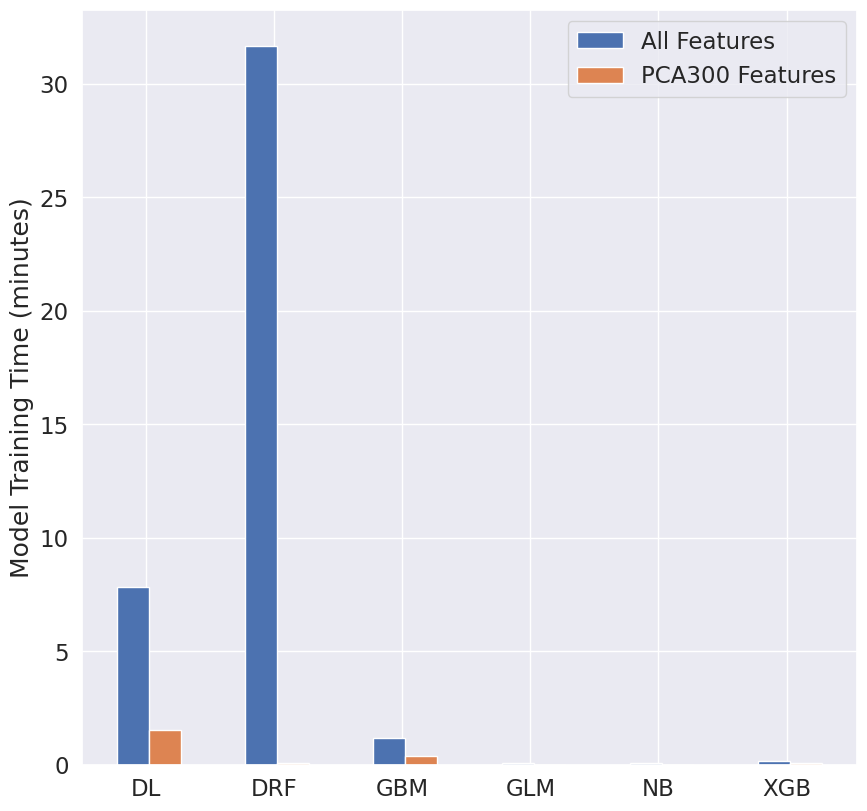

In [42]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 

plt.figure(
    figsize=(10,10),
    dpi=100)

# set width of bar
barWidth = 0.25
 
 

all_features_time_list = []

for mdl_tuple in all_final_model_metrics[0:12:2]:
    perf_dict = mdl_tuple[1]
    all_features_time_list.append(perf_dict['Training time (ms)'])
    pp.pprint(perf_dict['model_id'])


bars1 = all_features_time_list



pca300_time_list = []

for mdl_tuple in all_final_model_metrics[1:12:2]:
    perf_dict = mdl_tuple[1]
    pca300_time_list.append(perf_dict['Training time (ms)'])
    pp.pprint(perf_dict['model_id'])


bars2 =pca300_time_list



bars1 = list(map(lambda x: millis_to_minutes(x), 
all_features_time_list
))



bars2 = list(map(lambda x: millis_to_minutes(x), 
pca300_time_list
))


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='All Features')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='PCA300 Features')
 
# Add xticks on the middle of the group bars
# plt.xlabel('Cohort Drug Resistance Profile', fontweight='bold')
plt.xticks([r + 0.10 for r in range(len(bars1))], ['DL', 'DRF', 'GBM', 'GLM', 'NB', 'XGB'])
# plt.xticks(rotation=45)

plt.ylabel('Model Training Time (minutes)') 

# pyplot.xlabel('Statistics for samples with 500+ mutations') 


# Create legend & Show graphic
plt.legend()
plt.show()

# Visualization for STENs



## Combined Stacked Ensemble Metrics

'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_deeplearning'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_drf'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_gbm'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_glm'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_naivebayes'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_xgboost'
'stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_deeplearning'
'stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_drf'
'stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_gbm'
'stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_glm'
'stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_naivebayes'
'stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_xgboost'
'stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_deeplearning'
'stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_drf'
'stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_gbm'
'stacked_ensemble_ALL_FEATU

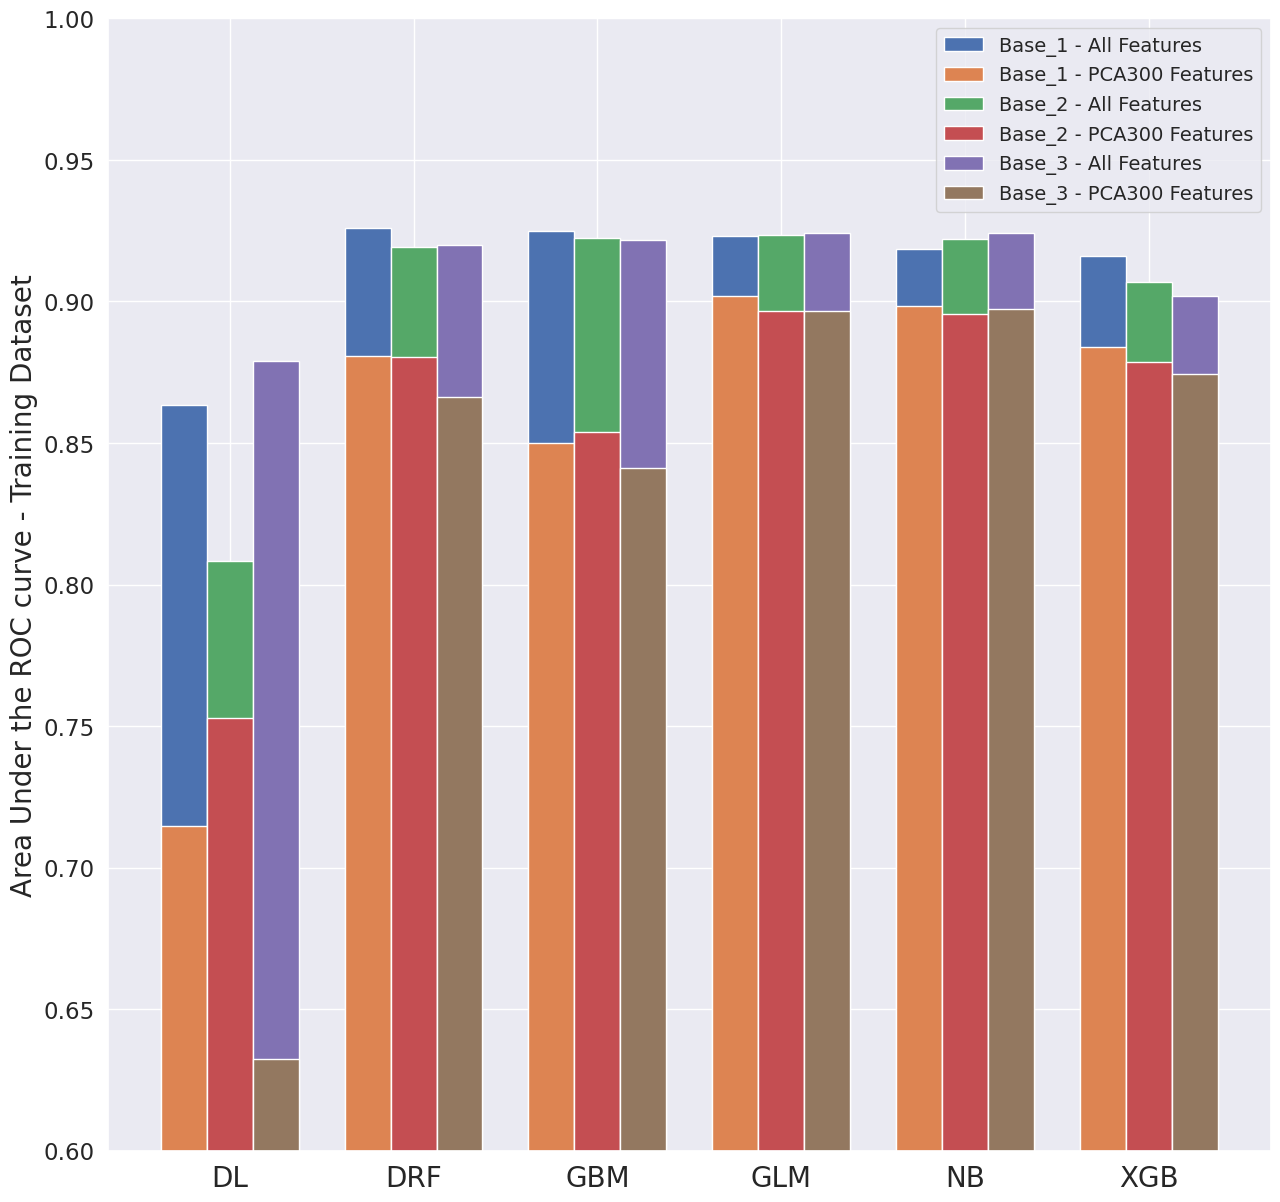

In [11]:
# NOTE: Performance of Top Models

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 

 



fig = plt.figure(
    figsize=(15,15),
    dpi=100)

ax = fig.add_subplot(1, 1, 1)


# set width of bar
barWidth = 0.25
 

bars1 = []

for mdl_tuple in all_final_model_metrics[12:24:2]:
    perf_dict = mdl_tuple[1]
    bars1.append(perf_dict['XVal AUC'])
    pp.pprint(perf_dict['model_id'])





bars2 = []

for mdl_tuple in all_final_model_metrics[13:24:2]:
    perf_dict = mdl_tuple[1]
    bars2.append(perf_dict['XVal AUC'])
    pp.pprint(perf_dict['model_id'])





#---------------------

# NOTE: Performance of Stacked Models with Checkpoint Base Learners


bars3 = []

for mdl_tuple in all_final_model_metrics[24:36:2]:
    perf_dict = mdl_tuple[1]
    bars3.append(perf_dict['XVal AUC'])
    pp.pprint(perf_dict['model_id'])





bars4 = []

for mdl_tuple in all_final_model_metrics[25:36:2]:
    perf_dict = mdl_tuple[1]
    bars4.append(perf_dict['XVal AUC'])
    pp.pprint(perf_dict['model_id'])




#---------------------

# NOTE: Performance of Stacked Models with Minimal Checkpoint Base Learners

bars5 = []

for mdl_tuple in all_final_model_metrics[36:48:2]:
    perf_dict = mdl_tuple[1]
    bars5.append(perf_dict['XVal AUC'])
    pp.pprint(perf_dict['model_id'])





bars6 = []

for mdl_tuple in all_final_model_metrics[37:48:2]:
    perf_dict = mdl_tuple[1]
    bars6.append(perf_dict['XVal AUC'])
    pp.pprint(perf_dict['model_id'])



#---------------------




# Set position of bar on X axis
r1 = np.arange(len(bars3))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]




plt.bar(r1, bars1, edgecolor='white', width=barWidth, label='Base_1 - All Features')
plt.bar(r1, bars2, bottom=0, edgecolor='white', width=barWidth, label='Base_1 - PCA300 Features')

 
plt.bar(r2, bars3, edgecolor='white', width=barWidth, label='Base_2 - All Features')
plt.bar(r2, bars4, bottom=0, edgecolor='white', width=barWidth, label='Base_2 - PCA300 Features')


plt.bar(r3, bars5, edgecolor='white', width=barWidth, label='Base_3 - All Features')
plt.bar(r3, bars6, bottom=0, edgecolor='white', width=barWidth, label='Base_3 - PCA300 Features')

 

plt.xticks([r1 + barWidth for r1 in range(len(bars3))], ['DL', 'DRF', 'GBM', 'GLM', 'NB', 'XGB'], fontsize= 20)

ax.set_ylim(0.6, 1)

 
plt.ylabel('Area Under the ROC curve - Training Dataset', fontsize= 20) 


# Show graphic
plt.legend(fontsize= 14)
plt.show()

'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_deeplearning'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_drf'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_gbm'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_glm'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_naivebayes'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_xgboost'
'stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_deeplearning'
'stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_drf'
'stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_gbm'
'stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_glm'
'stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_naivebayes'
'stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_xgboost'
'stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_deeplearning'
'stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_drf'
'stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_gbm'
'stacked_ensemble_ALL_FEATU

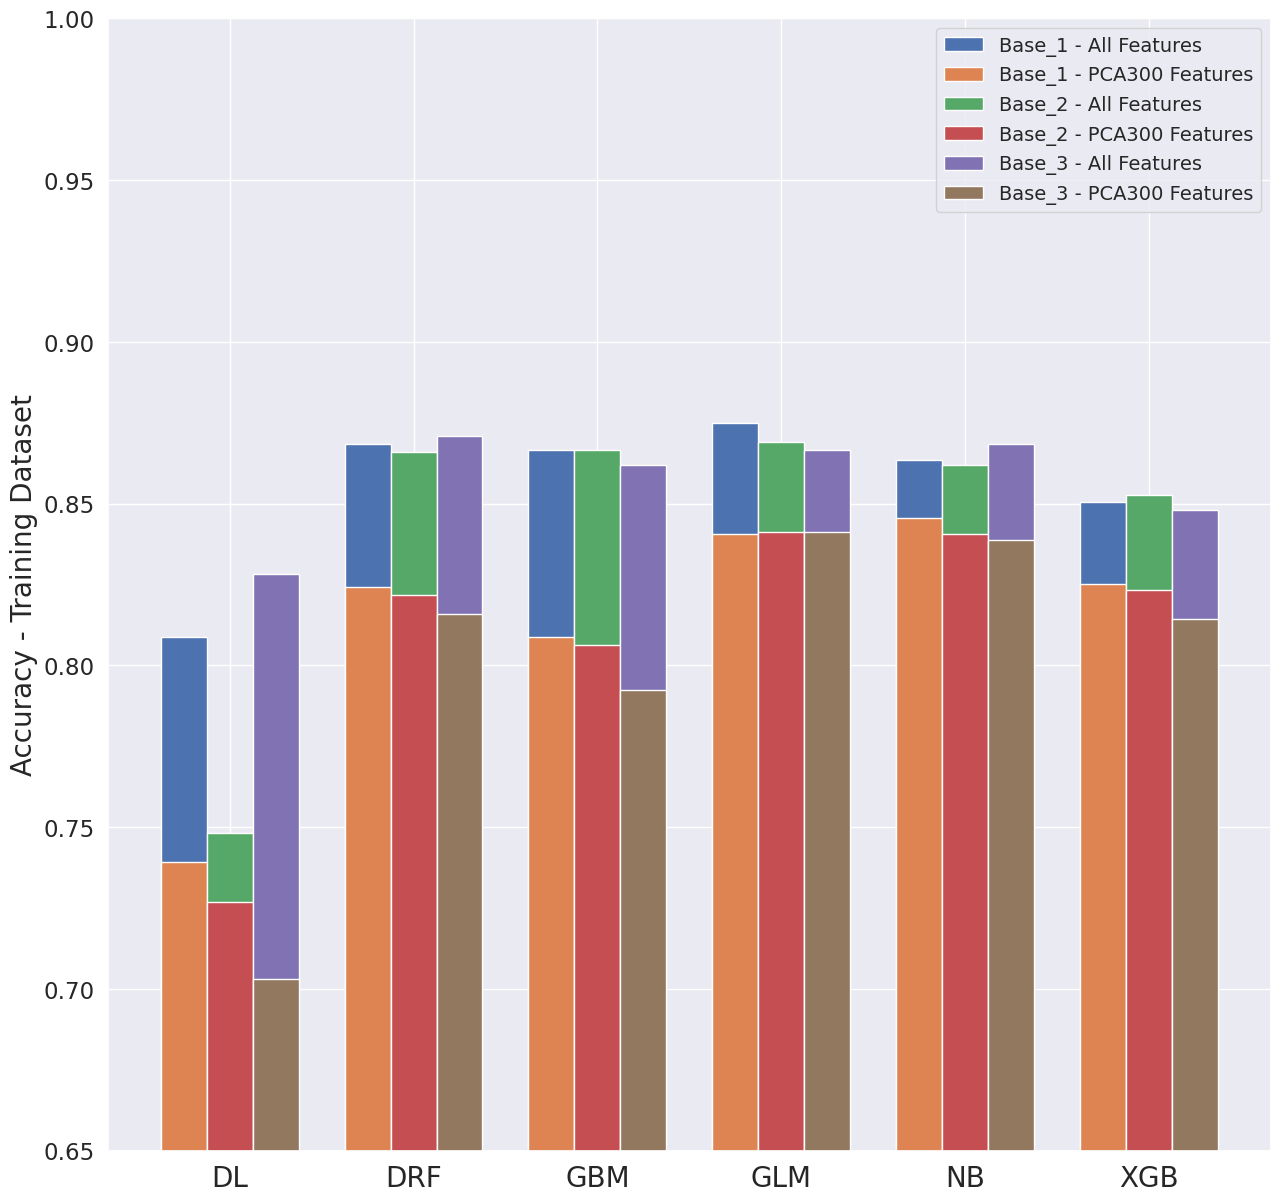

In [12]:
# NOTE: Performance of Top Models

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 


fig = plt.figure(
    figsize=(15,15),
    dpi=100)

ax = fig.add_subplot(1, 1, 1)


# set width of bar
barWidth = 0.25
 

bars1 = []

for mdl_tuple in all_final_model_metrics[12:24:2]:
    perf_dict = mdl_tuple[1]
    bars1.append(perf_dict['XVal Accuracy'])
    pp.pprint(perf_dict['model_id'])





bars2 = []

for mdl_tuple in all_final_model_metrics[13:24:2]:
    perf_dict = mdl_tuple[1]
    bars2.append(perf_dict['XVal Accuracy'])
    pp.pprint(perf_dict['model_id'])





#---------------------

# NOTE: Performance of Stacked Models with Checkpoint Base Learners


bars3 = []

for mdl_tuple in all_final_model_metrics[24:36:2]:
    perf_dict = mdl_tuple[1]
    bars3.append(perf_dict['XVal Accuracy'])
    pp.pprint(perf_dict['model_id'])





bars4 = []

for mdl_tuple in all_final_model_metrics[25:36:2]:
    perf_dict = mdl_tuple[1]
    bars4.append(perf_dict['XVal Accuracy'])
    pp.pprint(perf_dict['model_id'])




#---------------------

#---------------------

# NOTE: Performance of Stacked Models with Minimal Checkpoint Base Learners

bars5 = []

for mdl_tuple in all_final_model_metrics[36:48:2]:
    perf_dict = mdl_tuple[1]
    bars5.append(perf_dict['XVal Accuracy'])
    pp.pprint(perf_dict['model_id'])





bars6 = []

for mdl_tuple in all_final_model_metrics[37:48:2]:
    perf_dict = mdl_tuple[1]
    bars6.append(perf_dict['XVal Accuracy'])
    pp.pprint(perf_dict['model_id'])



#---------------------


# Set position of bar on X axis
r1 = np.arange(len(bars3))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]




plt.bar(r1, bars1, edgecolor='white', width=barWidth, label='Base_1 - All Features')
plt.bar(r1, bars2, bottom=0, edgecolor='white', width=barWidth, label='Base_1 - PCA300 Features')

 
 

plt.bar(r2, bars3, edgecolor='white', width=barWidth, label='Base_2 - All Features')
plt.bar(r2, bars4, bottom=0, edgecolor='white', width=barWidth, label='Base_2 - PCA300 Features')

 

plt.bar(r3, bars5, edgecolor='white', width=barWidth, label='Base_3 - All Features')
plt.bar(r3, bars6, bottom=0, edgecolor='white', width=barWidth, label='Base_3 - PCA300 Features')

 

# Custom X axis
plt.xticks([r1 + barWidth for r1 in range(len(bars3))], ['DL', 'DRF', 'GBM', 'GLM', 'NB', 'XGB'], fontsize= 20)

ax.set_ylim(0.65, 1)

 
plt.ylabel('Accuracy - Training Dataset', fontsize= 20) 

# Show graphic
plt.legend(fontsize= 14)
plt.show()

### Validation Data

'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_deeplearning'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_drf'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_gbm'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_glm'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_naivebayes'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_xgboost'
'stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_deeplearning'
'stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_drf'
'stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_gbm'
'stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_glm'
'stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_naivebayes'
'stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_xgboost'
'stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_deeplearning'
'stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_drf'
'stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_gbm'
'stacked_ensemble_ALL_FEATU

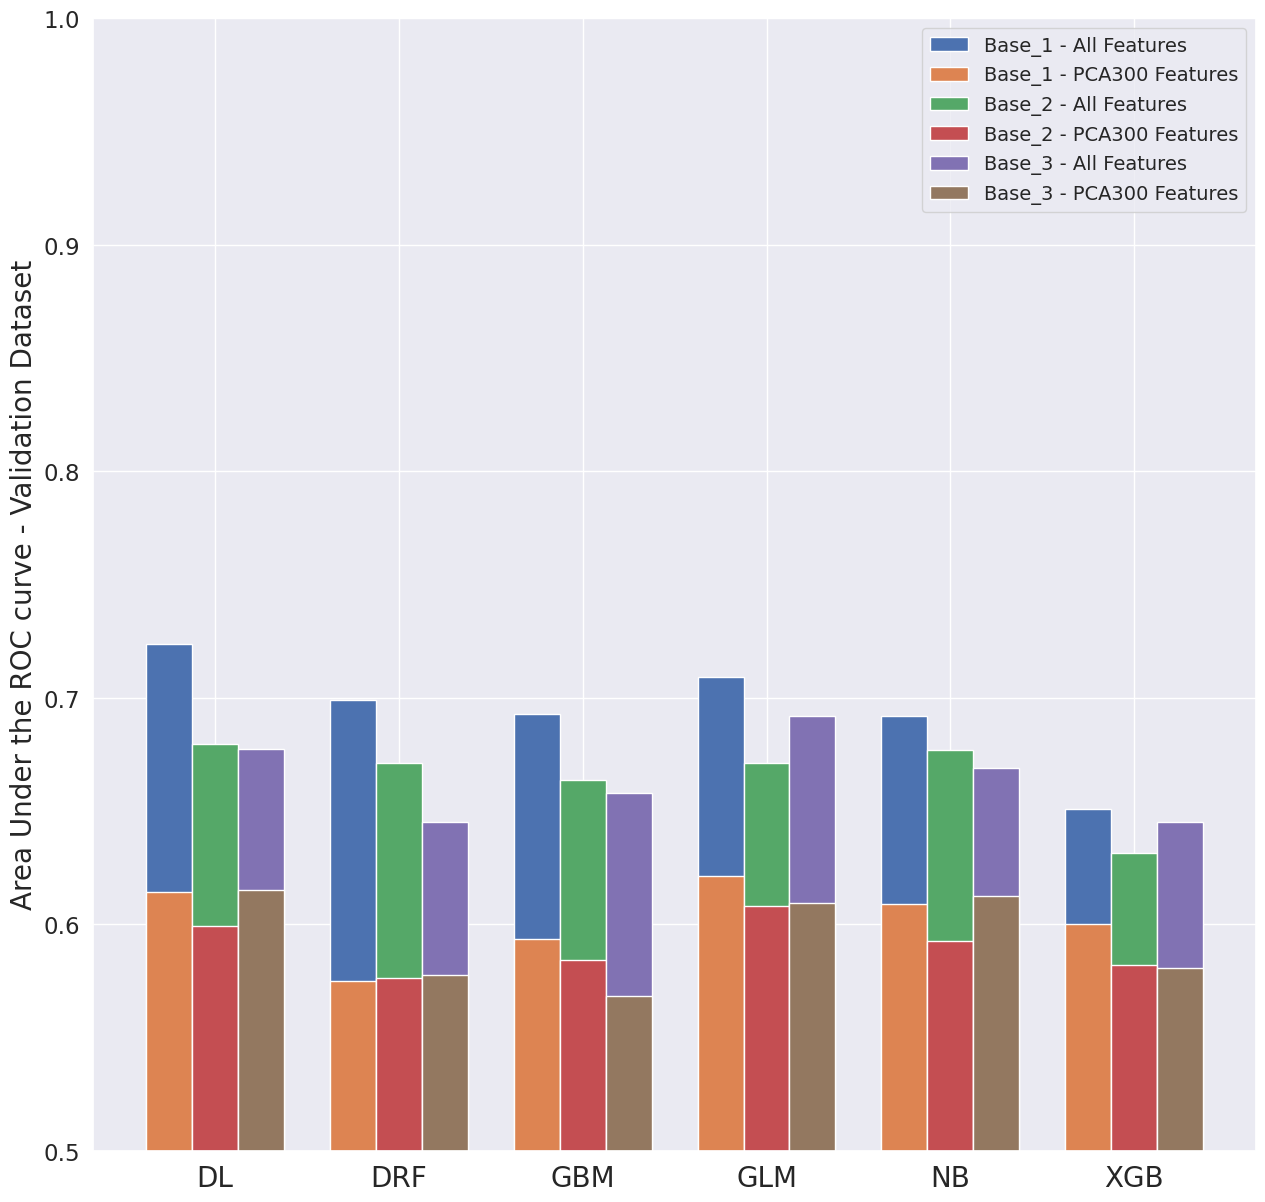

In [15]:
# NOTE: Performance of Top Models

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 

METRIC = 'Validation data AUC'




fig = plt.figure(
    figsize=(15,15),
    dpi=100)

ax = fig.add_subplot(1, 1, 1)


# set width of bar
barWidth = 0.25
 

bars1 = []

for mdl_tuple in all_final_model_metrics[12:24:2]:
    perf_dict = mdl_tuple[1]
    bars1.append(perf_dict[METRIC])
    pp.pprint(perf_dict['model_id'])





bars2 = []

for mdl_tuple in all_final_model_metrics[13:24:2]:
    perf_dict = mdl_tuple[1]
    bars2.append(perf_dict[METRIC])
    pp.pprint(perf_dict['model_id'])





#---------------------

# NOTE: Performance of Stacked Models with Checkpoint Base Learners


bars3 = []

for mdl_tuple in all_final_model_metrics[24:36:2]:
    perf_dict = mdl_tuple[1]
    bars3.append(perf_dict[METRIC])
    pp.pprint(perf_dict['model_id'])





bars4 = []

for mdl_tuple in all_final_model_metrics[25:36:2]:
    perf_dict = mdl_tuple[1]
    bars4.append(perf_dict[METRIC])
    pp.pprint(perf_dict['model_id'])




#---------------------

# NOTE: Performance of Stacked Models with Minimal Checkpoint Base Learners

bars5 = []

for mdl_tuple in all_final_model_metrics[36:48:2]:
    perf_dict = mdl_tuple[1]
    bars5.append(perf_dict[METRIC])
    pp.pprint(perf_dict['model_id'])





bars6 = []

for mdl_tuple in all_final_model_metrics[37:48:2]:
    perf_dict = mdl_tuple[1]
    bars6.append(perf_dict[METRIC])
    pp.pprint(perf_dict['model_id'])



#---------------------




# Set position of bar on X axis
r1 = np.arange(len(bars3))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]




plt.bar(r1, bars1, edgecolor='white', width=barWidth, label='Base_1 - All Features')
plt.bar(r1, bars2, bottom=0, edgecolor='white', width=barWidth, label='Base_1 - PCA300 Features')

 
plt.bar(r2, bars3, edgecolor='white', width=barWidth, label='Base_2 - All Features')
plt.bar(r2, bars4, bottom=0, edgecolor='white', width=barWidth, label='Base_2 - PCA300 Features')


plt.bar(r3, bars5, edgecolor='white', width=barWidth, label='Base_3 - All Features')
plt.bar(r3, bars6, bottom=0, edgecolor='white', width=barWidth, label='Base_3 - PCA300 Features')

 

plt.xticks([r1 + barWidth for r1 in range(len(bars3))], ['DL', 'DRF', 'GBM', 'GLM', 'NB', 'XGB'], fontsize= 20)

ax.set_ylim(0.5, 1)

 
plt.ylabel('Area Under the ROC curve - Validation Dataset', fontsize= 20) 


# Show graphic
plt.legend(fontsize= 14)
plt.show()

'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_deeplearning'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_drf'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_gbm'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_glm'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_naivebayes'
'stacked_ensemble_ALL_FEATURES_ALL_MODELS_metalearner_xgboost'
'stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_deeplearning'
'stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_drf'
'stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_gbm'
'stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_glm'
'stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_naivebayes'
'stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_xgboost'
'stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_deeplearning'
'stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_drf'
'stacked_ensemble_ALL_FEATURES_CHECKPOINT_MODELS_metalearner_gbm'
'stacked_ensemble_ALL_FEATU

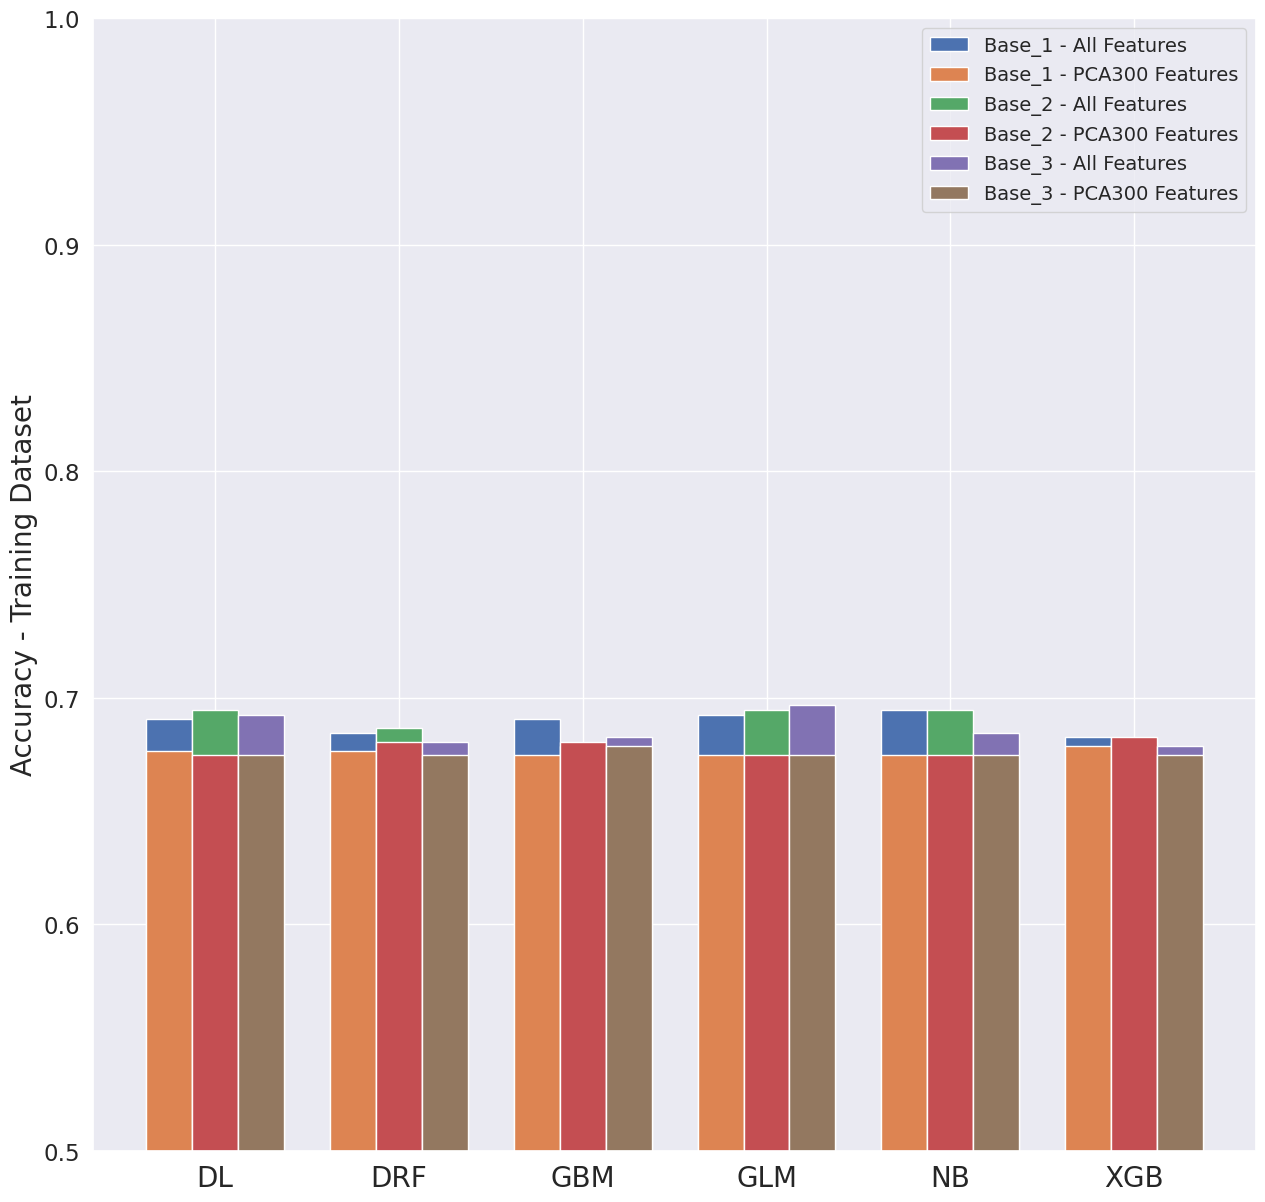

In [17]:
# NOTE: Performance of Top Models

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
METRIC = 'Validation data Accuracy'

fig = plt.figure(
    figsize=(15,15),
    dpi=100)

ax = fig.add_subplot(1, 1, 1)


# set width of bar
barWidth = 0.25
 

bars1 = []

for mdl_tuple in all_final_model_metrics[12:24:2]:
    perf_dict = mdl_tuple[1]
    bars1.append(perf_dict[METRIC])
    pp.pprint(perf_dict['model_id'])





bars2 = []

for mdl_tuple in all_final_model_metrics[13:24:2]:
    perf_dict = mdl_tuple[1]
    bars2.append(perf_dict[METRIC])
    pp.pprint(perf_dict['model_id'])





#---------------------

# NOTE: Performance of Stacked Models with Checkpoint Base Learners


bars3 = []

for mdl_tuple in all_final_model_metrics[24:36:2]:
    perf_dict = mdl_tuple[1]
    bars3.append(perf_dict[METRIC])
    pp.pprint(perf_dict['model_id'])





bars4 = []

for mdl_tuple in all_final_model_metrics[25:36:2]:
    perf_dict = mdl_tuple[1]
    bars4.append(perf_dict[METRIC])
    pp.pprint(perf_dict['model_id'])




#---------------------

#---------------------

# NOTE: Performance of Stacked Models with Minimal Checkpoint Base Learners

bars5 = []

for mdl_tuple in all_final_model_metrics[36:48:2]:
    perf_dict = mdl_tuple[1]
    bars5.append(perf_dict[METRIC])
    pp.pprint(perf_dict['model_id'])





bars6 = []

for mdl_tuple in all_final_model_metrics[37:48:2]:
    perf_dict = mdl_tuple[1]
    bars6.append(perf_dict[METRIC])
    pp.pprint(perf_dict['model_id'])



#---------------------


# Set position of bar on X axis
r1 = np.arange(len(bars3))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]




plt.bar(r1, bars1, edgecolor='white', width=barWidth, label='Base_1 - All Features')
plt.bar(r1, bars2, bottom=0, edgecolor='white', width=barWidth, label='Base_1 - PCA300 Features')

 
 

plt.bar(r2, bars3, edgecolor='white', width=barWidth, label='Base_2 - All Features')
plt.bar(r2, bars4, bottom=0, edgecolor='white', width=barWidth, label='Base_2 - PCA300 Features')

 

plt.bar(r3, bars5, edgecolor='white', width=barWidth, label='Base_3 - All Features')
plt.bar(r3, bars6, bottom=0, edgecolor='white', width=barWidth, label='Base_3 - PCA300 Features')

 

# Custom X axis
plt.xticks([r1 + barWidth for r1 in range(len(bars3))], ['DL', 'DRF', 'GBM', 'GLM', 'NB', 'XGB'], fontsize= 20)

ax.set_ylim(0.50, 1)

 
plt.ylabel('Accuracy - Va Dataset', fontsize= 20) 

# Show graphic
plt.legend(fontsize= 14)
plt.show()